# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
fossils=pd.read_csv('train_data.csv') # loading the dataset

Features


uranium_lead_ratio: Ratio of uranium to lead isotopes in the fossil sample.

carbon_14_ratio: Ratio of carbon-14 isotopes present in the fossil sample.

radioactive_decay_series: Measurement of the decay series from parent to daughter isotopes.

stratigraphic_layer_depth: Depth of the fossil within the stratigraphic layer, in meters.

isotopic_composition: Proportion of different isotopes within the fossil sample.

fossil_size: Size of the fossil, in centimeters.

fossil_weight: Weight of the fossil, in grams.

geological_period: Geological period during which the fossil was formed.

surrounding_rock_type: Type of rock surrounding the fossil.

paleomagnetic_data: Paleomagnetic orientation data of the fossil site.

stratigraphic_position: Position of the fossil within the stratigraphic column.

age: Calculated age of the fossil based on various features, in years.

In [3]:
df=fossils.copy() # making a copy of the dataset so that analysis wont effect the original data.
df.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                      91.17        Cretaceous    Normal polarity   
1                     165.44          Cambrian    Normal polarity   
2                     218.98          Cambrian    Normal polarity   
3                      51.09           Permian    Normal polarity   
4                     313.72          Devonian    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.915951          Conglomerate   
1                       False              0.803968             Limestone   
2                        True              0.792441                 Shale   
3                        True              0.074636             Limestone   
4                        True              1.646640                 Shale   

  stratigraphic_position  fossil_size  fossil_weight    age  
0                 Middle        50.65         432.00  43523  
1                    Top        48.85         353.29  44112  
2                 Bottom        37.66         371.33  43480  
3                 Bottom        39.10         232.84  30228  
4                    Top        90.84         277.67  67217

In [4]:
df.shape # checking the size of the dataset

(4398, 13)

In [5]:
df.info() # checking name of the column and datatype in it matches or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtypes: bool(1), float64(7), int64(1),

In [6]:
df['age']=df['age'].values/10000  # as our target column is a large number we are converting it into a small number.

In [7]:
df.head()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                      91.17        Cretaceous    Normal polarity   
1                     165.44          Cambrian    Normal polarity   
2                     218.98          Cambrian    Normal polarity   
3                      51.09           Permian    Normal polarity   
4                     313.72          Devonian    Normal polarity   

   inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                       False              0.915951          Conglomerate   
1                       False              0.803968             Limestone   
2                        True              0.792441                 Shale   
3                        True              0.074636             Limestone   
4                        True              1.646640                 Shale   

  stratigraphic_position  fossil_size  fossil_weight     age  
0                 Middle        50.65         432.00  4.3523  
1                    Top        48.85         353.29  4.4112  
2                 Bottom        37.66         371.33  4.3480  
3                 Bottom        39.10         232.84  3.0228  
4                    Top        90.84         277.67  6.7217

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   float64
dtypes: bool(1), float64(8), object(4)

In [9]:
df['inclusion_of_other_fossils']=df['inclusion_of_other_fossils'].astype(int)  # converting the boolean type column into
# integer so it is eaiser for the analysis.

In [10]:
df.isnull().sum() # checking the null values

uranium_lead_ratio            0
carbon_14_ratio               0
radioactive_decay_series      0
stratigraphic_layer_depth     0
geological_period             0
paleomagnetic_data            0
inclusion_of_other_fossils    0
isotopic_composition          0
surrounding_rock_type         0
stratigraphic_position        0
fossil_size                   0
fossil_weight                 0
age                           0
dtype: int64

In [11]:
df.duplicated().sum() # checking any duplicates present in the dataset

0

In [12]:
df_num=df.select_dtypes(include=np.number)
df_num.describe()
# creating a dataframe of numeric values as df_numeric it makes eaiser for EDA.

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         4398.000000      4398.000000               4398.000000   
mean             0.486938         0.430116                  0.532054   
std              0.257132         0.233536                  0.287929   
min              0.000241         0.000244                  0.000076   
25%              0.294091         0.246269                  0.316775   
50%              0.473715         0.416046                  0.511830   
75%              0.658012         0.590752                  0.723805   
max              1.533270         1.000000                  1.513325   

       stratigraphic_layer_depth  inclusion_of_other_fossils  \
count                4398.000000                 4398.000000   
mean                  152.832801                    0.620055   
std                    86.272234                    0.485428   
min                     0.130000                    0.000000   
25%                    85.390000                    0.000000   
50%                   146.000000                    1.000000   
75%                   211.932500                    1.000000   
max                   494.200000                    1.000000   

       isotopic_composition  fossil_size  fossil_weight          age  
count           4398.000000  4398.000000    4398.000000  4398.000000  
mean               0.938315    70.702460     326.655177     4.058666  
std                0.521643    37.352584     187.032333     1.520070  
min                0.000275     0.130000       0.620000     0.420800  
25%                0.533519    42.487500     181.047500     2.976625  
50%                0.905684    68.785000     308.260000     3.956700  
75%                1.289307    96.440000     455.520000     5.055050  
max                3.071434   216.390000    1010.090000    10.307900

In [13]:
df_cat=df.select_dtypes(include=object)
df_cat.describe()
# creating new dataframe for categoric columns in the dataset.

geological_period paleomagnetic_data surrounding_rock_type  \
count               4398               4398                  4398   
unique                11                  2                     4   
top             Cambrian    Normal polarity             Sandstone   
freq                 882               3160                  1497   

       stratigraphic_position  
count                    4398  
unique                      3  
top                    Bottom  
freq                     2667

# Univariate Analysis

In [14]:
for i in df_cat.columns: # for every categorical column printing count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         882
Triassic         676
Cretaceous       601
Devonian         498
Jurassic         490
Paleogene        405
Permian          365
Neogene          311
Ordovician       100
Carboniferous     52
Silurian          18
Name: count, dtype: int64


paleomagnetic_data
paleomagnetic_data
Normal polarity      3160
Reversed polarity    1238
Name: count, dtype: int64


surrounding_rock_type
surrounding_rock_type
Sandstone       1497
Limestone       1166
Shale           1144
Conglomerate     591
Name: count, dtype: int64


stratigraphic_position
stratigraphic_position
Bottom    2667
Middle    1267
Top        464
Name: count, dtype: int64




In [15]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




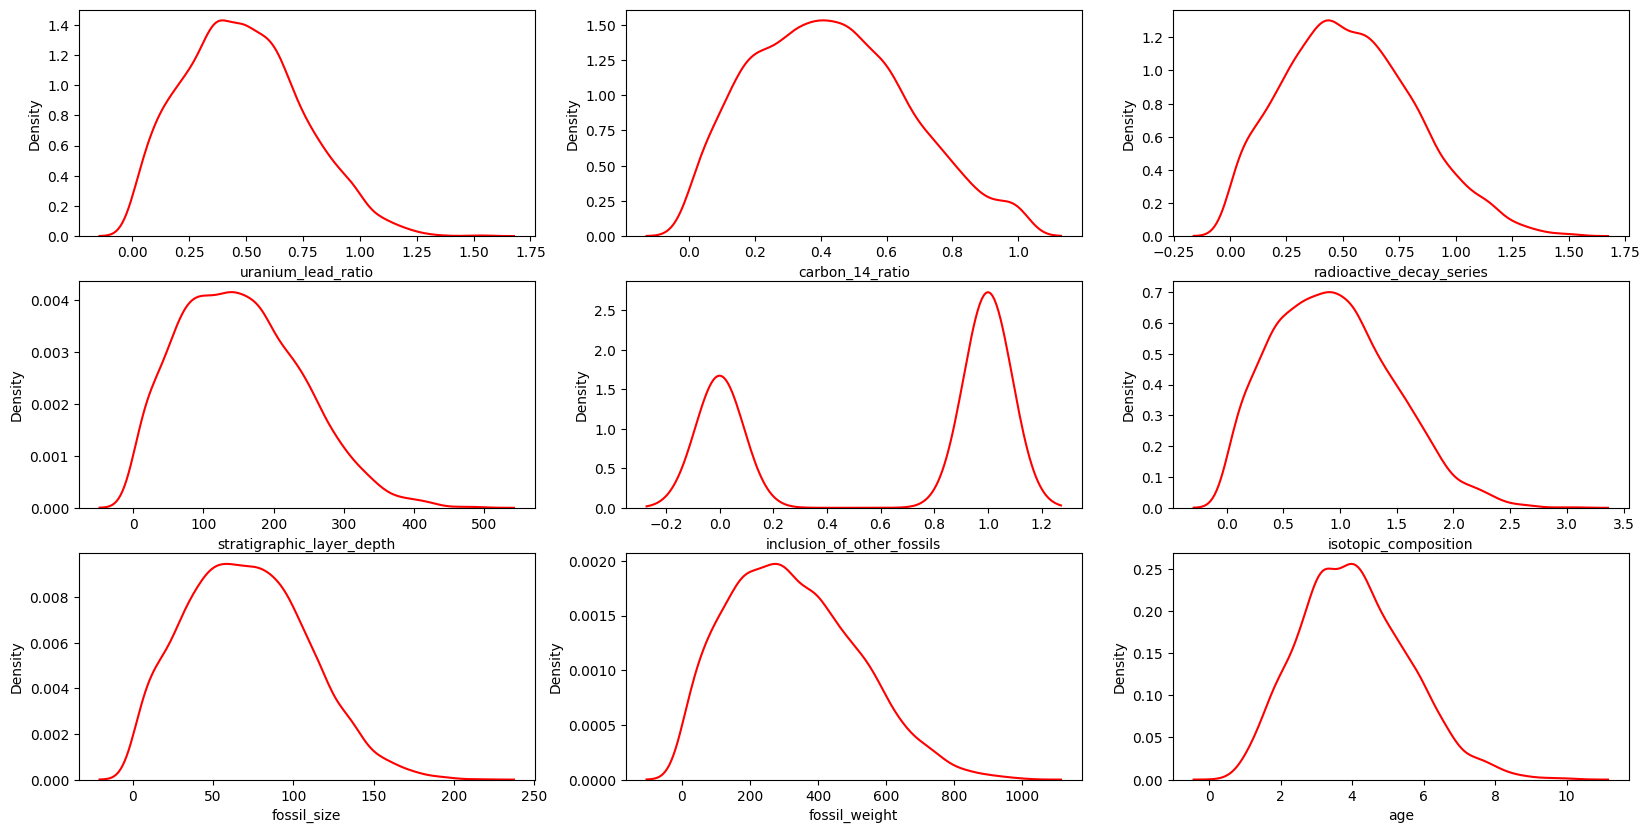

In [16]:

cols=df_num.columns
fig,ax = plt.subplots(3,3,figsize=(20,10))
k=0
for i in range(3):
    for j in range(3):
        sns.distplot(df_num[cols[k]],ax=ax[i][j],hist=False,color='red')
        k=k+1

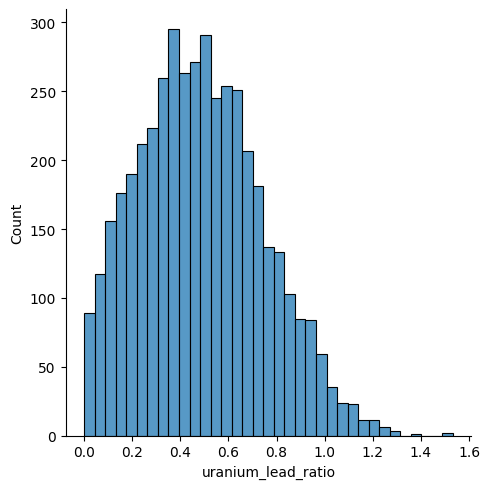

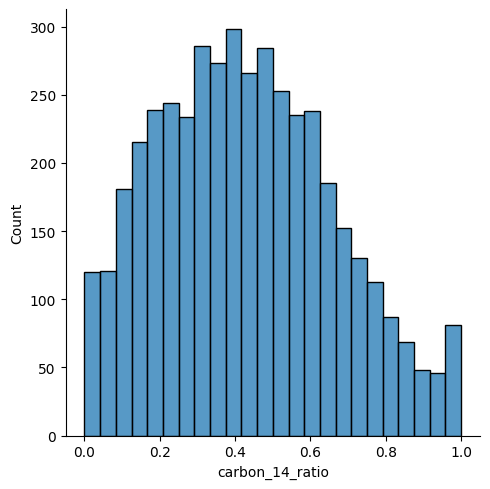

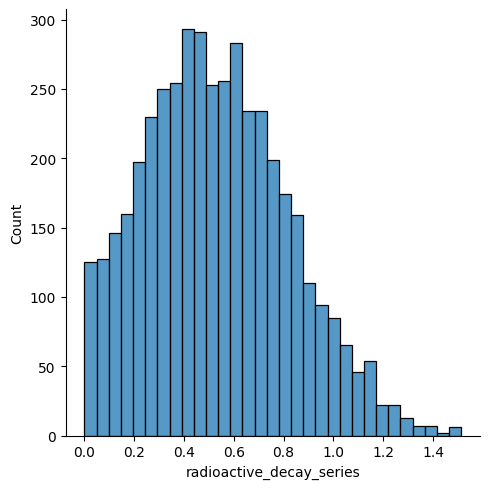

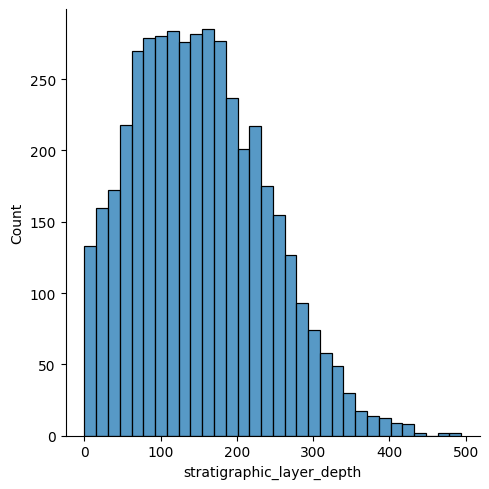

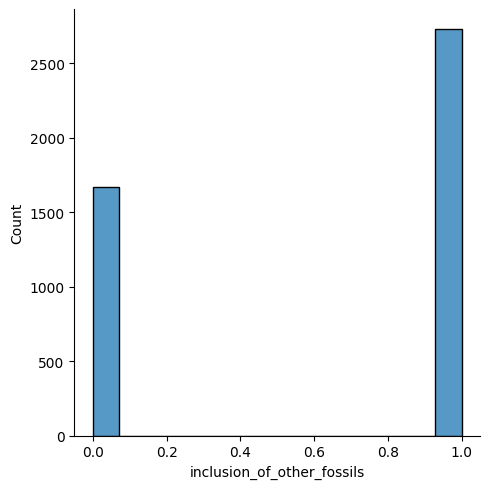

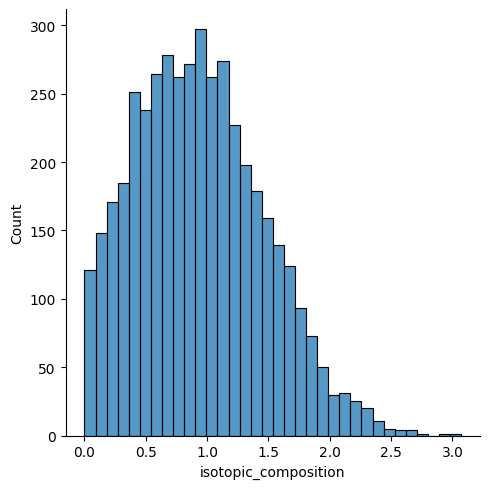

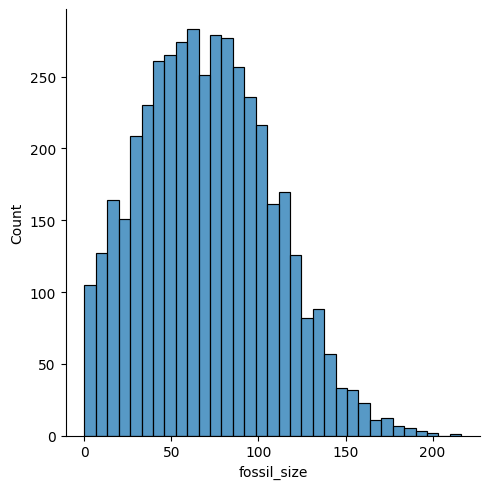

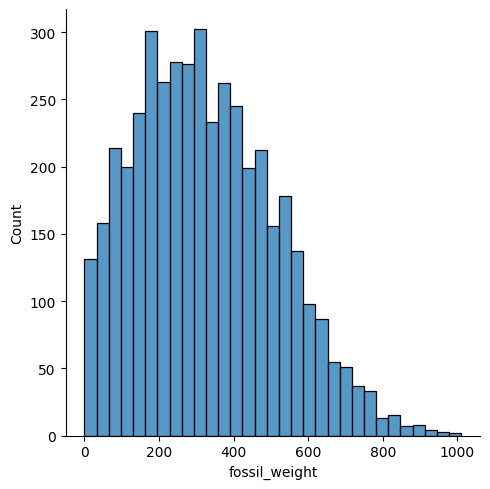

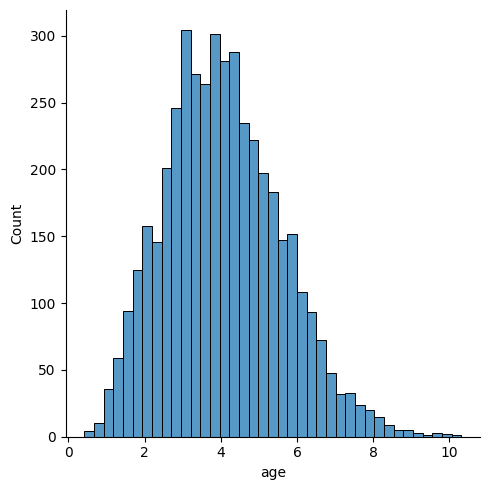

In [17]:
for i in df_num.columns:  # plotting box plot for every numeric column to know the data and outliers.
    sns.displot(df_num[i])
    plt.show()

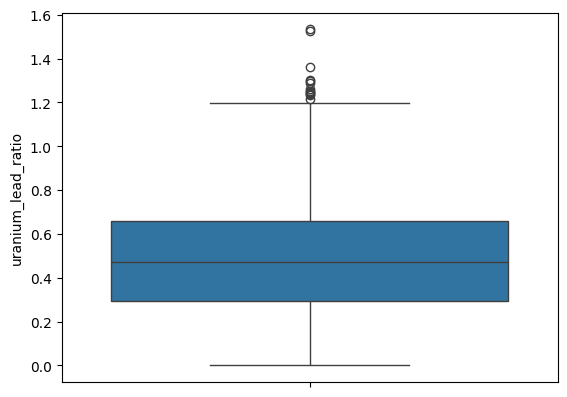

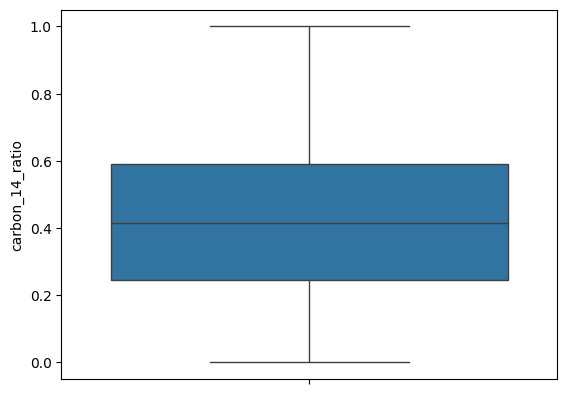

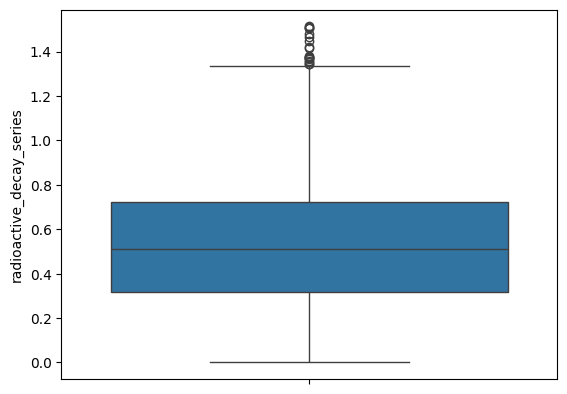

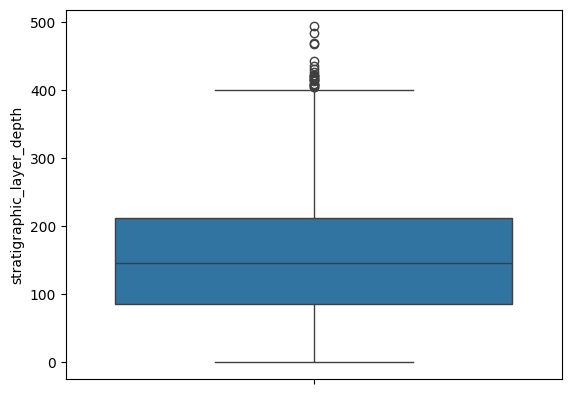

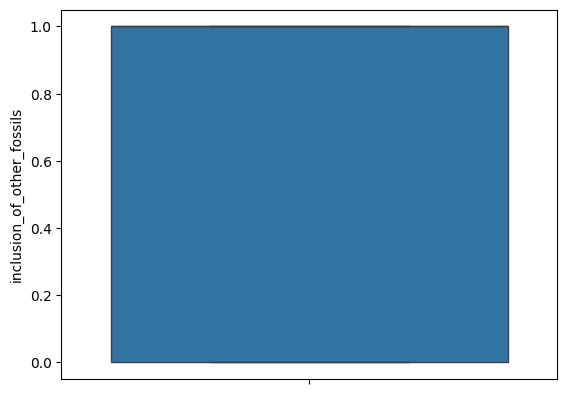

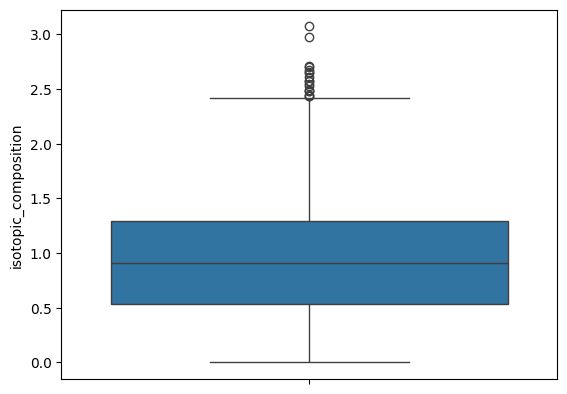

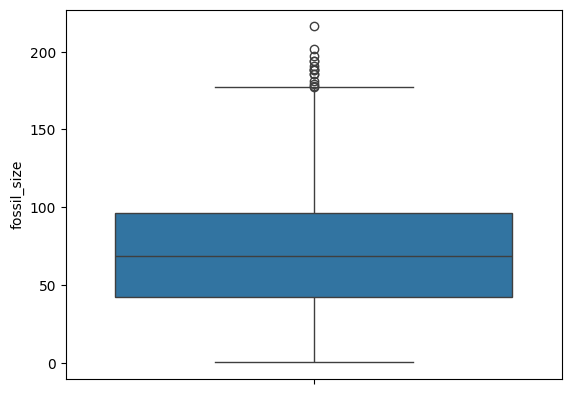

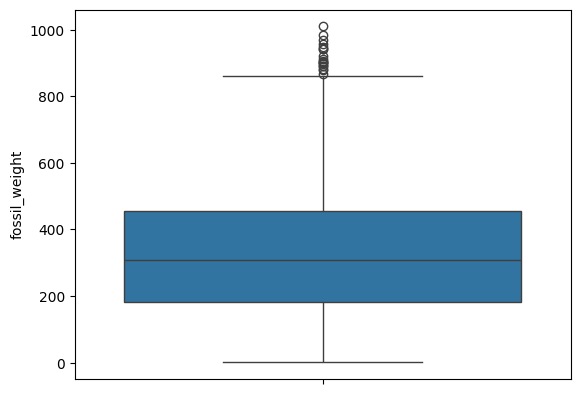

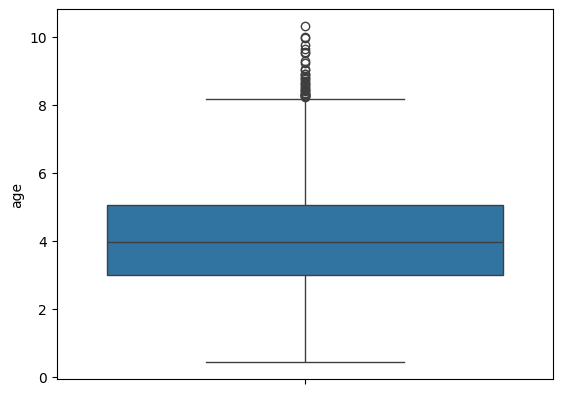

In [18]:
for i in df_num.columns:  # plotting box plot for every numeric column to know the data and outliers.
    sns.boxplot(df_num[i])
    plt.show()

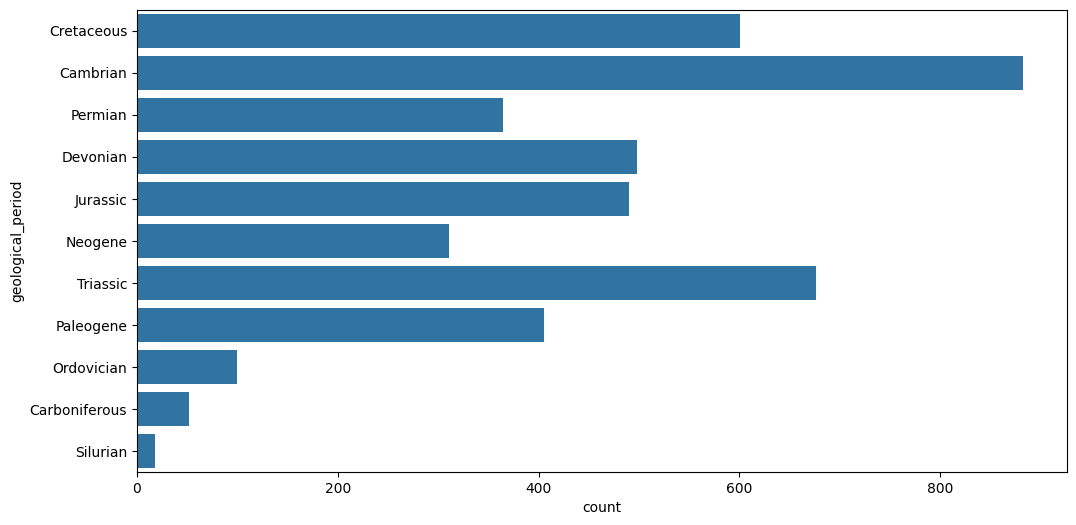

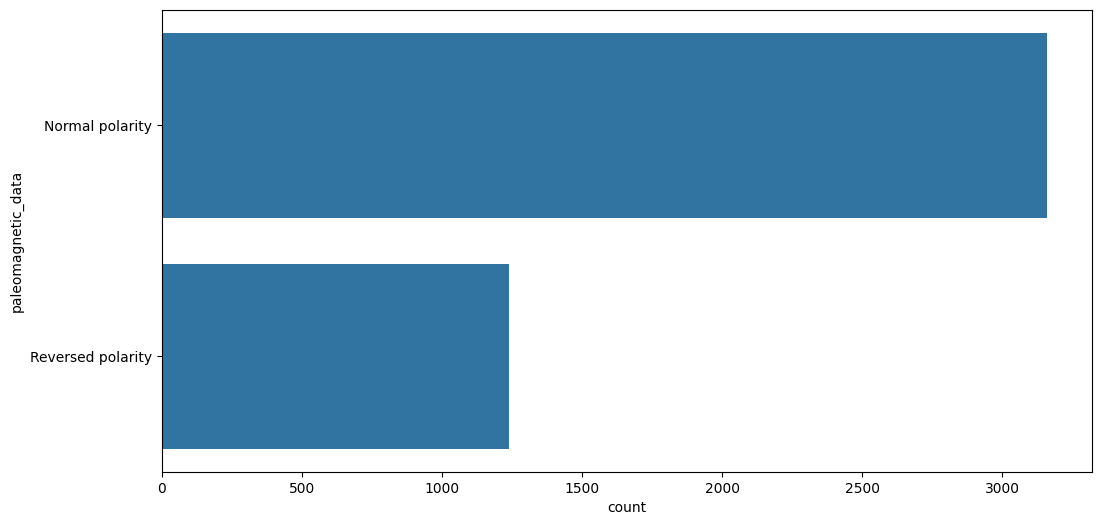

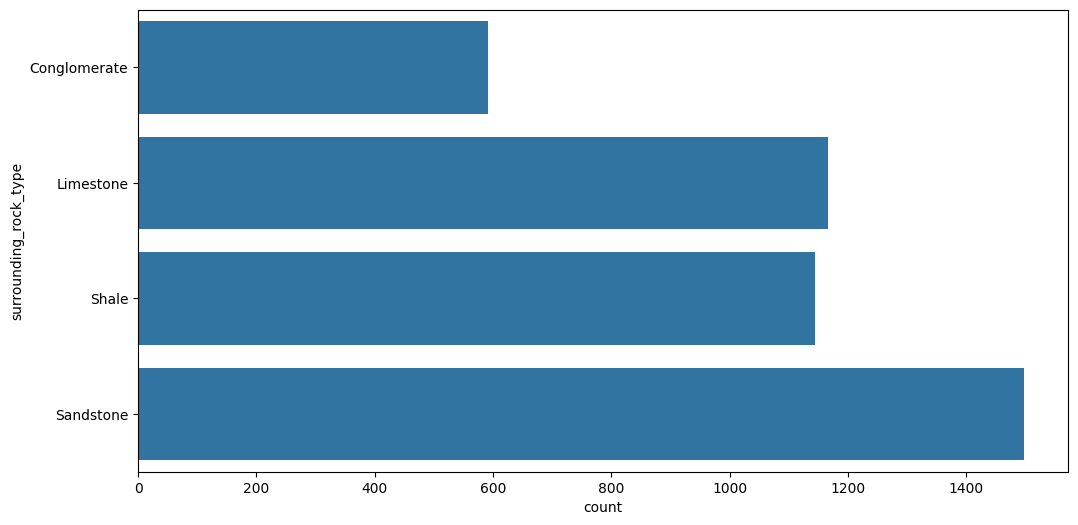

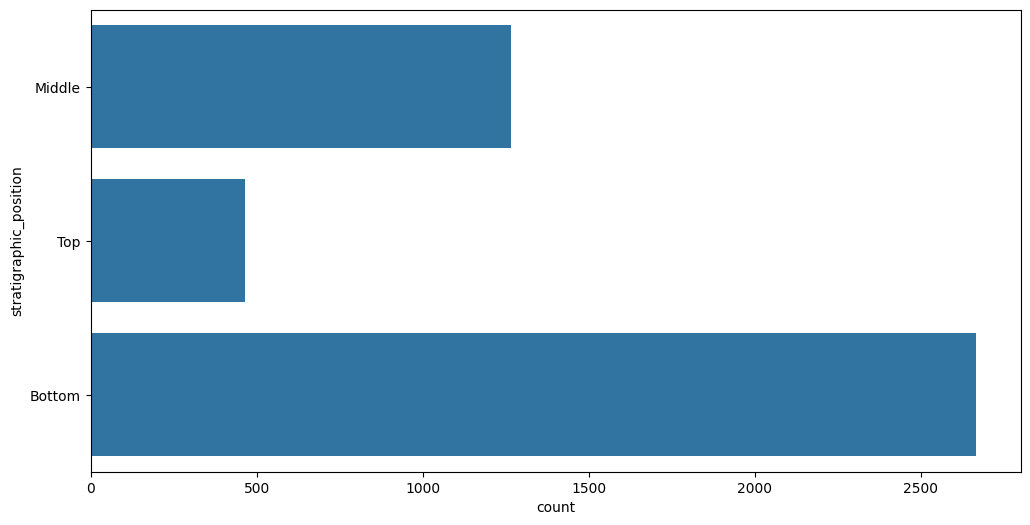

In [19]:
for i in df_cat.columns:  # count plot for categorical column and how subclasses are spread.
    plt.figure(figsize=(12,6))
    sns.countplot(df_cat[i])
    plt.show()

# Univariate Analysis

In [20]:
df

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0               0.738061         0.487707                  0.907884   
1               0.560096         0.341738                  1.121302   
2               0.424773         0.218493                  0.103855   
3               0.349958         0.704649                  0.383617   
4               0.886811         0.777494                  0.593254   
...                  ...              ...                       ...   
4393            0.049660         0.601750                  0.762490   
4394            0.360085         0.215033                  1.002406   
4395            0.464864         0.553313                  0.659639   
4396            0.803338         0.272392                  0.123562   
4397            0.321577         0.348233                  0.265161   

      stratigraphic_layer_depth geological_period paleomagnetic_data  \
0                         91.17        Cretaceous    Normal polarity   
1                        165.44          Cambrian    Normal polarity   
2                        218.98          Cambrian    Normal polarity   
3                         51.09           Permian    Normal polarity   
4                        313.72          Devonian    Normal polarity   
...                         ...               ...                ...   
4393                     222.54          Jurassic  Reversed polarity   
4394                     276.70        Cretaceous  Reversed polarity   
4395                      76.77          Devonian    Normal polarity   
4396                     204.82           Neogene  Reversed polarity   
4397                     436.61        Cretaceous    Normal polarity   

      inclusion_of_other_fossils  isotopic_composition surrounding_rock_type  \
0                              0              0.915951          Conglomerate   
1                              0              0.803968             Limestone   
2                              1              0.792441                 Shale   
3                              1              0.074636             Limestone   
4                              1              1.646640                 Shale   
...                          ...                   ...                   ...   
4393                           1              2.247495             Sandstone   
4394                           1              1.004584          Conglomerate   
4395                           1              0.721947          Conglomerate   
4396                           1              1.496427             Sandstone   
4397                           1              0.256842             Sandstone   

     stratigraphic_position  fossil_size  fossil_weight     age  
0                    Middle        50.65         432.00  4.3523  
1                       Top        48.85         353.29  4.4112  
2                    Bottom        37.66         371.33  4.3480  
3                    Bottom        39.10         232.84  3.0228  
4                       Top        90.84         277.67  6.7217  
...                     ...          ...            ...     ...  
4393                 Bottom        91.69         415.13  2.6606  
4394                 Bottom        68.97         121.10  4.4850  
4395                 Middle        11.37         288.73  3.2186  
4396                 Bottom       132.34         518.31  5.9888  
4397                    Top         1.70         279.37  4.0809  

[4398 rows x 13 columns]

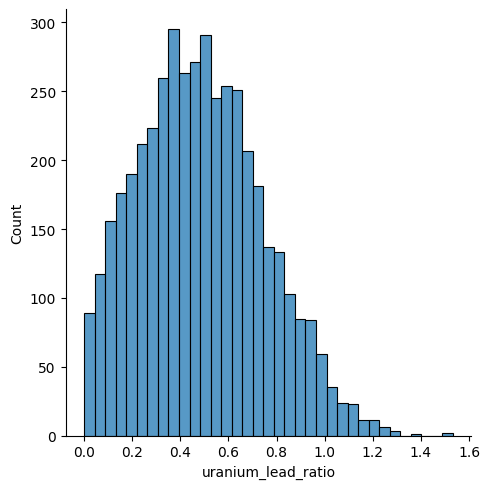

In [21]:
sns.displot(df['uranium_lead_ratio'])

# from the distribution plot we can see that the data is right skewed.
# we have some outliers in the right that means some rare fossils contains high proporsion of uranium_lead_ratio
# most of the fossils contain uranium_lead_ration between 0.4-0.6

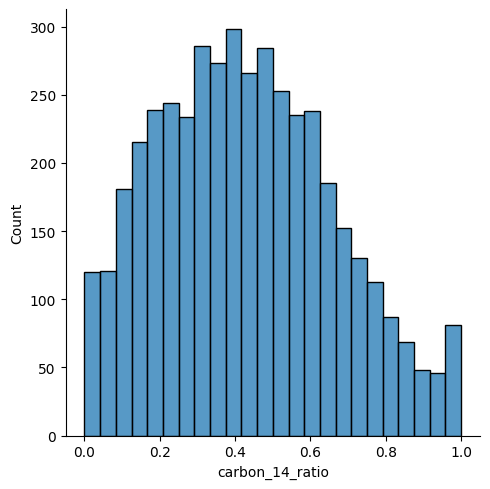

In [22]:
sns.displot(df['carbon_14_ratio'])
# most of the fossils has carbon contians between 0.4-0.6

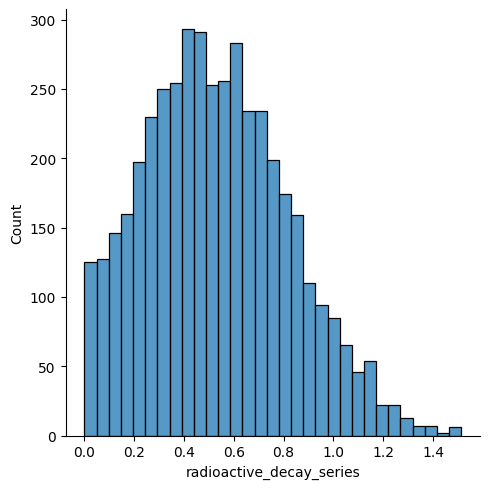

In [23]:
sns.displot(df['radioactive_decay_series'])
# most of the fossils have same radioactive_decay series.
# however some fossils have extreme radioactive _decay process.

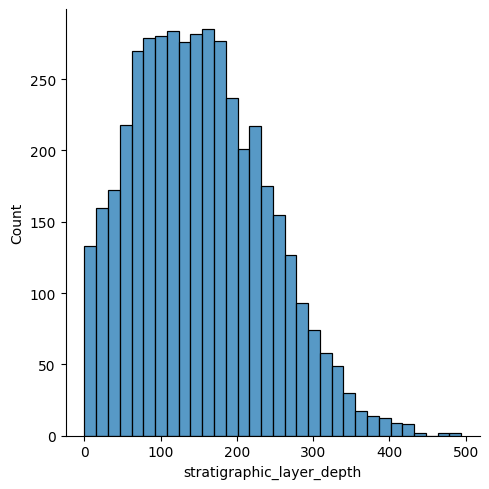

In [24]:
sns.displot(df['stratigraphic_layer_depth'])
# most of the fossils found in the depth of between 0-300 meters
# some rare fossils found above 400 of depth may be they are so old fossils

In [25]:
df['geological_period'].value_counts()
# most of the fossils are formed in the period of Cambrian then Triassic and so on.
# least fossils are formed in the period of Silurian period.

geological_period
Cambrian         882
Triassic         676
Cretaceous       601
Devonian         498
Jurassic         490
Paleogene        405
Permian          365
Neogene          311
Ordovician       100
Carboniferous     52
Silurian          18
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='geological_period'>

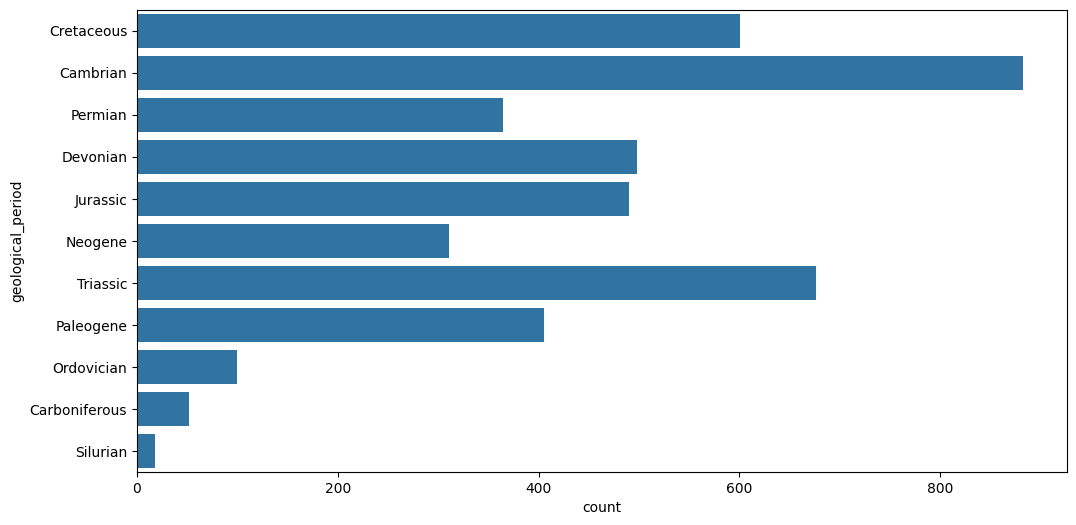

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(df['geological_period'])
# here is the count plot of how many fossils formed in each period.

In [27]:
df['paleomagnetic_data'].value_counts()
# describes the magnetic field of the earth where the fossils are formed and the magnetic field that fossil present in.

paleomagnetic_data
Normal polarity      3160
Reversed polarity    1238
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='paleomagnetic_data'>

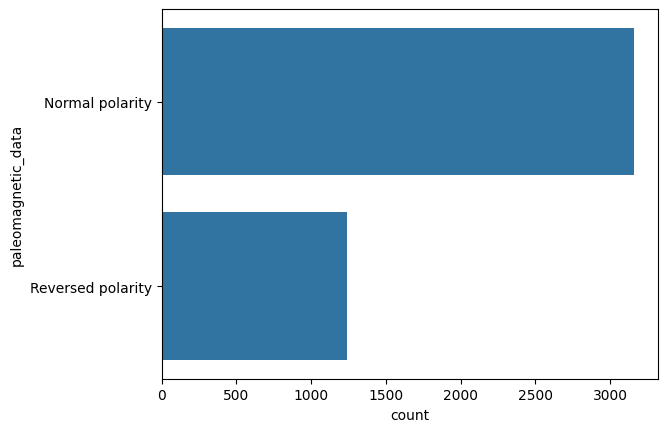

In [28]:
sns.countplot(df['paleomagnetic_data'])
# count plot of the magnetic data of the earth to see how it is distributed.

In [29]:
df['inclusion_of_other_fossils'].value_counts()
# describes how many fossils are contaminated by the other fossils present in that location.
# it is a boolean value.

inclusion_of_other_fossils
1    2727
0    1671
Name: count, dtype: int64

<Axes: ylabel='count'>

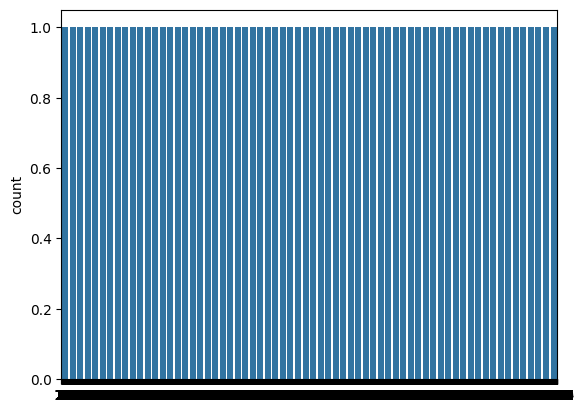

In [30]:
sns.countplot(df['inclusion_of_other_fossils'])
# count plot of the inclussion of other fossils tells how many fossils contains data of other fossils.
# and distributed among themselves.

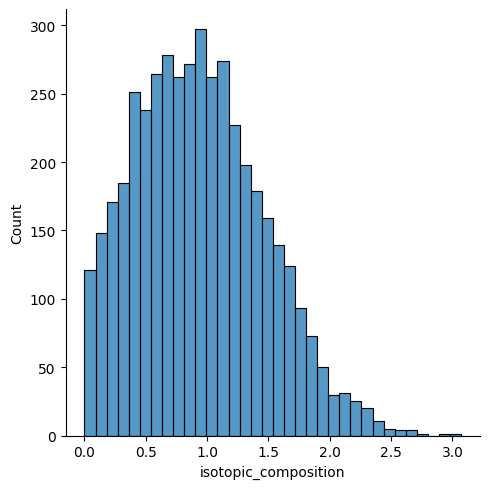

In [31]:
sns.displot(df['isotopic_composition'])
# most of the fossils contains the proportion of other isotopes is between 0.5-1.5

In [32]:
df['surrounding_rock_type'].value_counts()
# it is the count of what kind of rock present around the fossil and which rock help to delay the decay process.
# here we can see that most of the fossils are from sandstone which means these rocks may be helpfull in delaying the process
# of decay.

surrounding_rock_type
Sandstone       1497
Limestone       1166
Shale           1144
Conglomerate     591
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='surrounding_rock_type'>

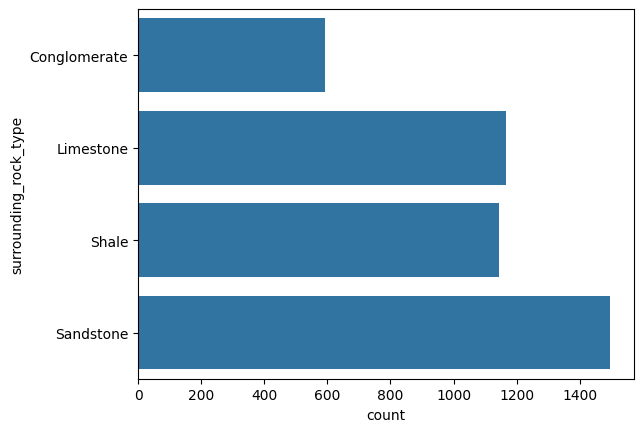

In [33]:
sns.countplot(df['surrounding_rock_type'])
# count plot of rock type and no of fossils found in them.

In [34]:
df['stratigraphic_position'].value_counts()
# where the fossil found in the stratigraphic positions
# most of the fossils are found in the bottom
# less no of fossils are found in Top .

stratigraphic_position
Bottom    2667
Middle    1267
Top        464
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='stratigraphic_position'>

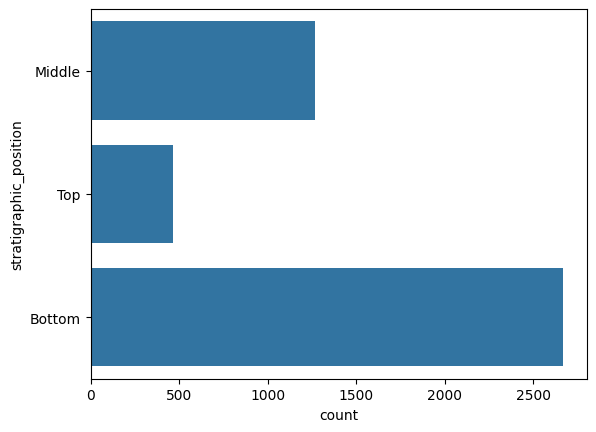

In [35]:
sns.countplot(df['stratigraphic_position'])
# count plot for the positon of the fossils

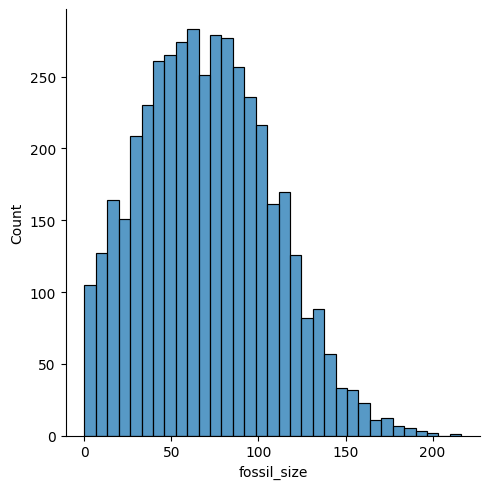

In [36]:
sns.displot(df['fossil_size'])
# most of the fossil size are in between 50-100

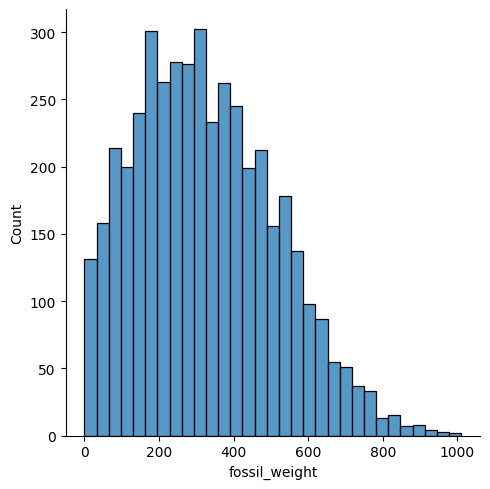

In [37]:
sns.displot(df['fossil_weight'])
# most of the fossils are below the weight of 600 and some are exception to the graph.

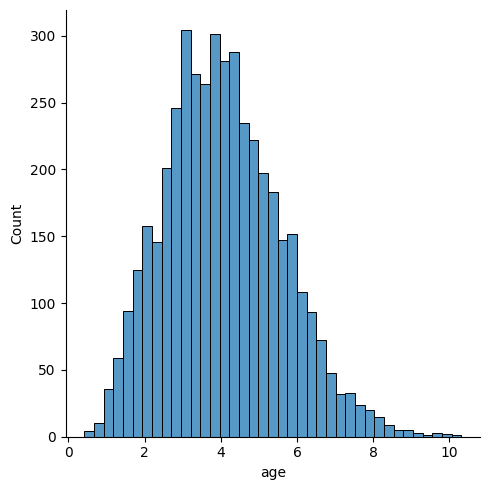

In [38]:
sns.displot(df['age'])
# most of fossils we got are from around 2000-6000 years old and some of the fosssils are even 10000 years  old also.

# Bi-variate Analysis

<Axes: >

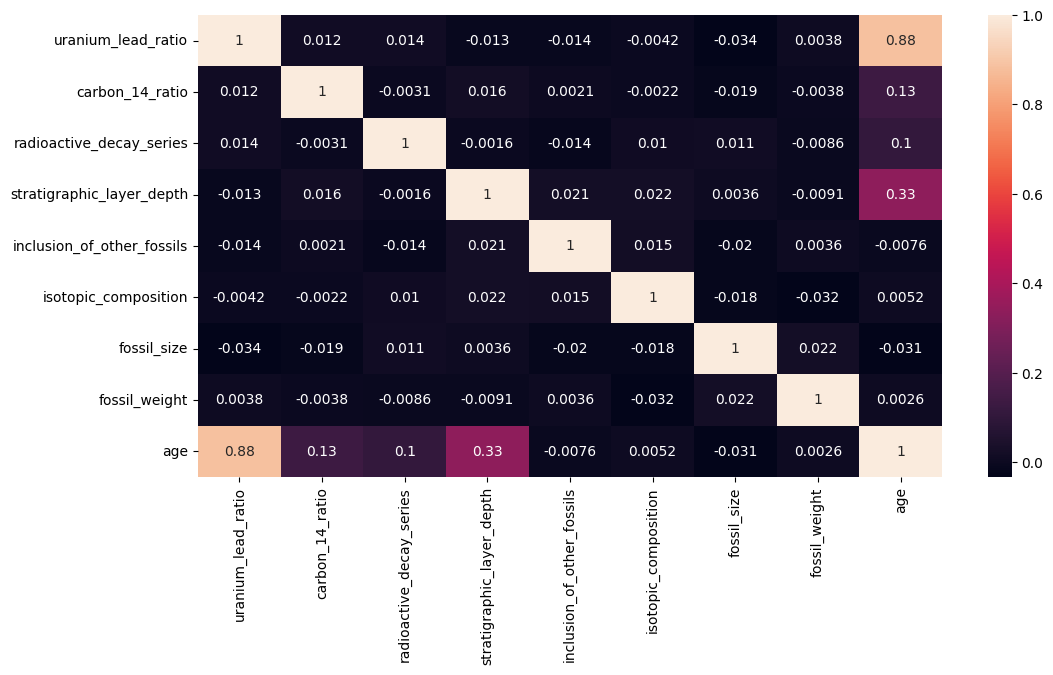

In [40]:
plt.figure(figsize=(12,6))
sns.heatmap(df_num.corr(),annot=True)

# from this correlation map we can say that most of the columns have linear relationship by the age column
# each column is contributing to tell the age of the fossils we have.
# here we can see that there is no multicollinearity between coloumns as each column speaks about different aspects.

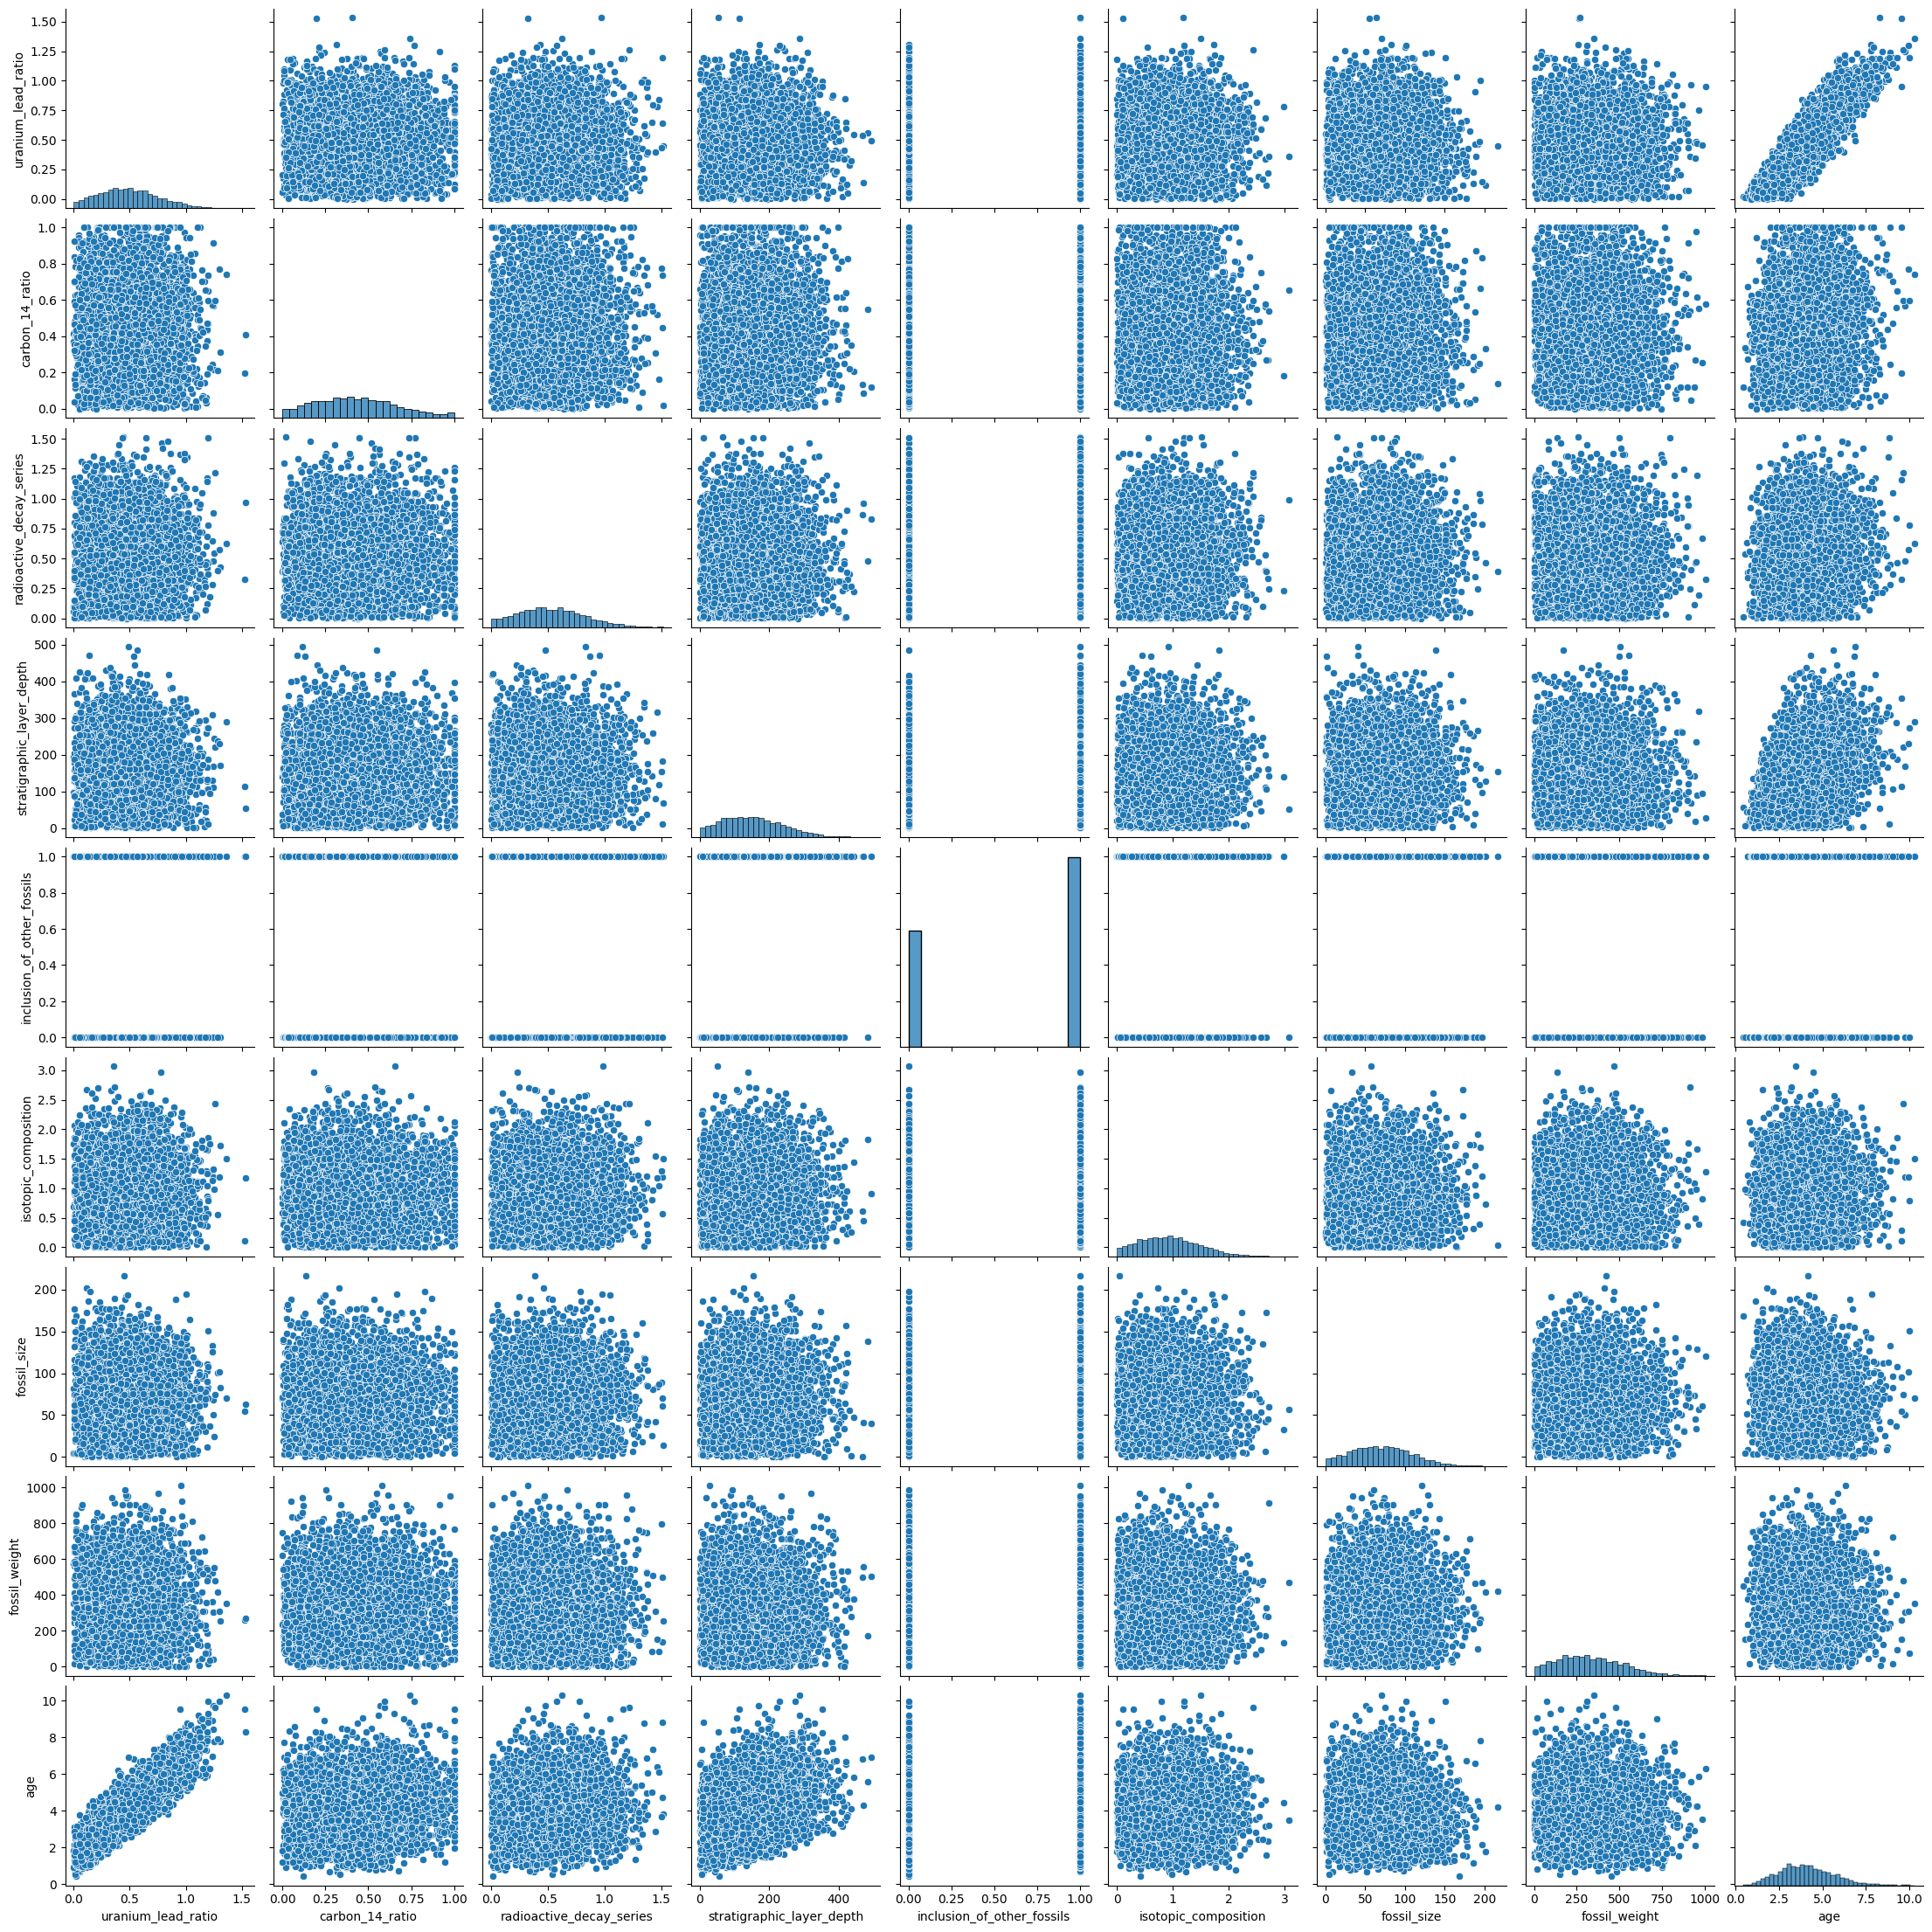

In [41]:
sns.pairplot(df) # plotting a pair plot to see presence of correlation we found in above heatmap

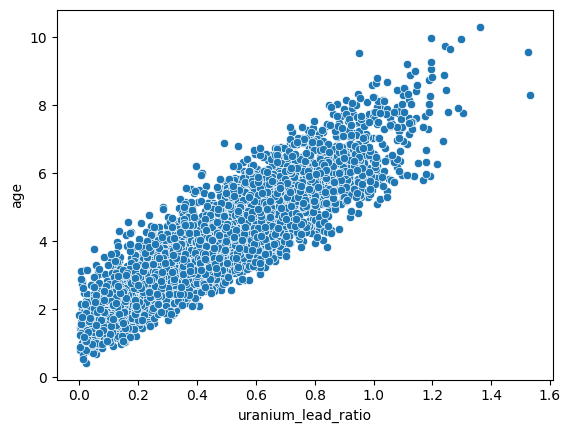

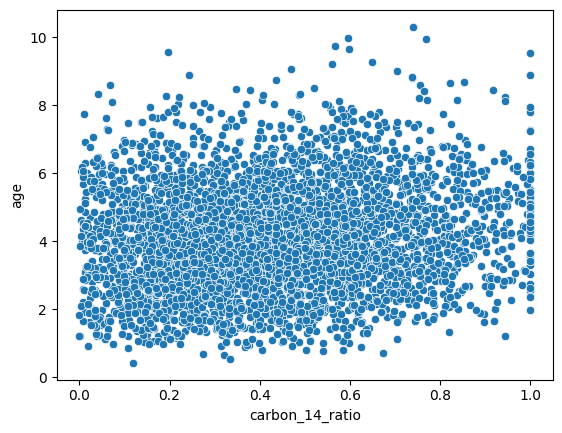

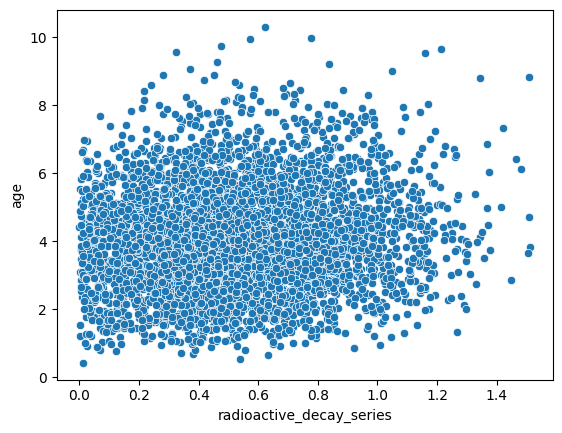

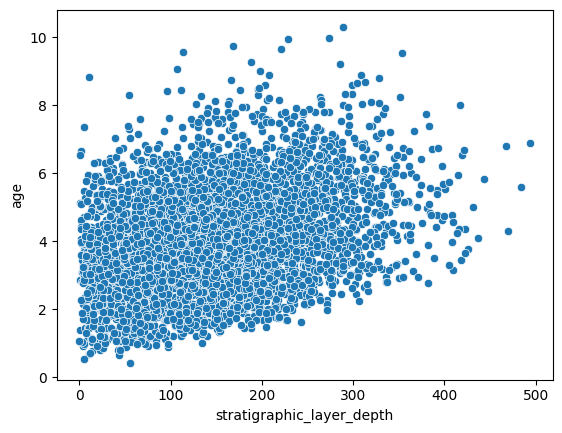

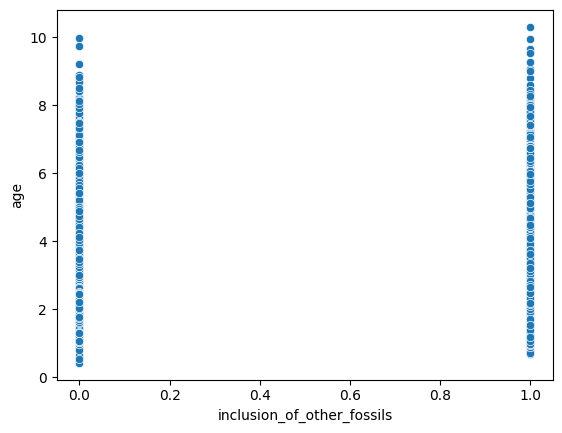

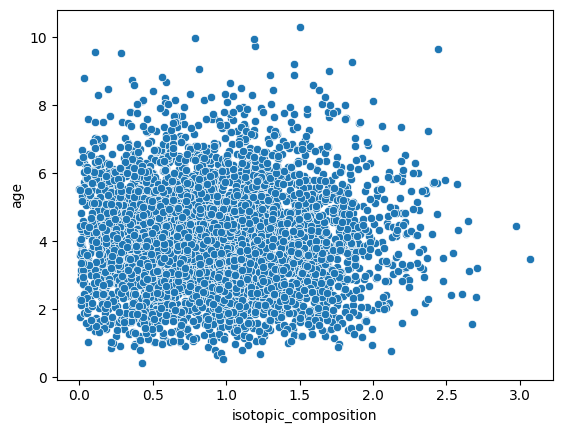

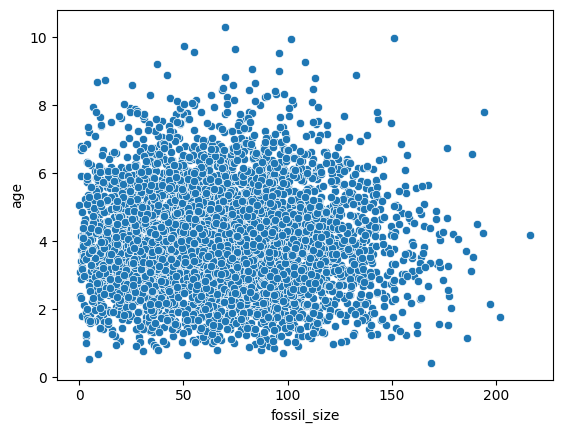

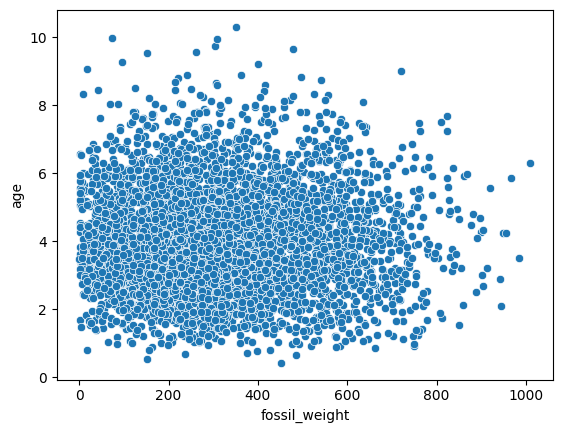

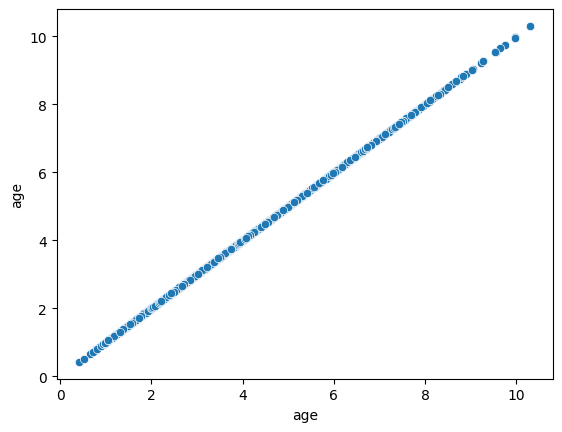

In [42]:
for i in df_num.columns:
    sns.scatterplot(x=df_num[i],y=df['age'])
    plt.show()
# plotting a scatter plot for each numeric column with the target column 'age' to see any trend present between them.
# by seeing the plots we can see that there is a clear pattern between uranium_lead_ration and age and stratigraphic layer_depth.

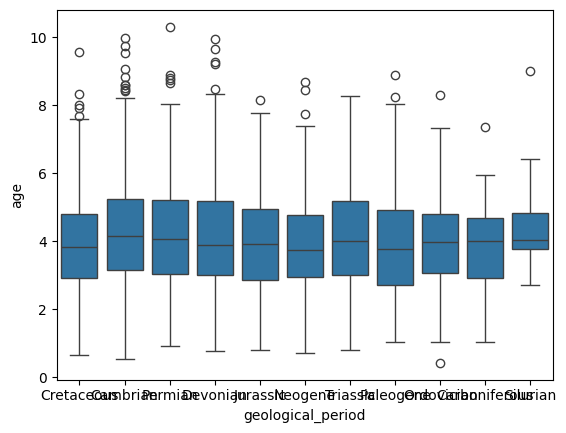

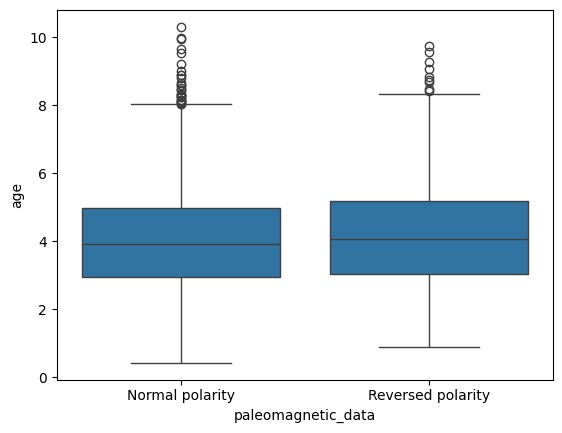

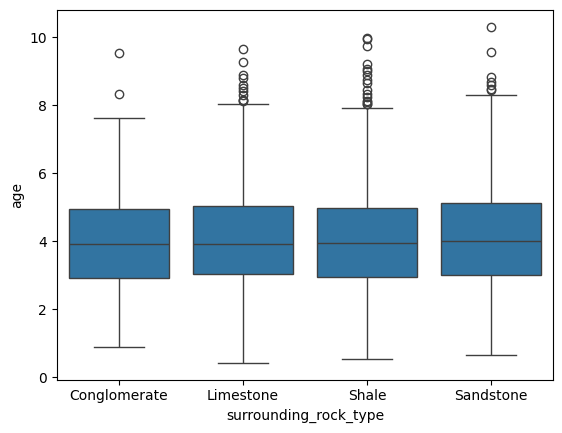

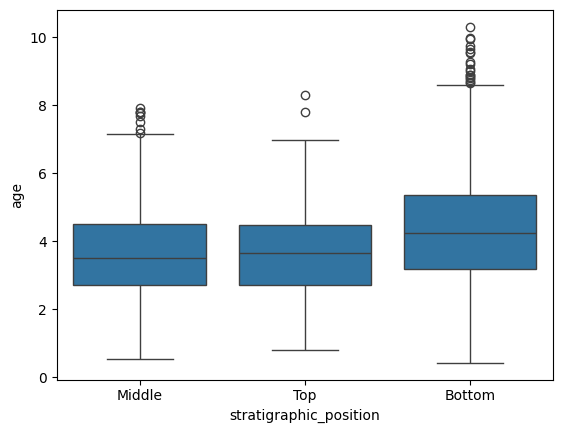

In [43]:
for i in df_cat.columns:
    sns.boxplot(x=df_cat[i],y=df['age'])
    plt.show()

# plotting box plot between each categoric column with respect to the age column to see there are any insights we can get.
# by seeing at the box plot we can say a lot like which have high propoertion of saying and so on.

# Study of Outliers and Treatment.

uranium_lead_ratio

<Axes: ylabel='uranium_lead_ratio'>

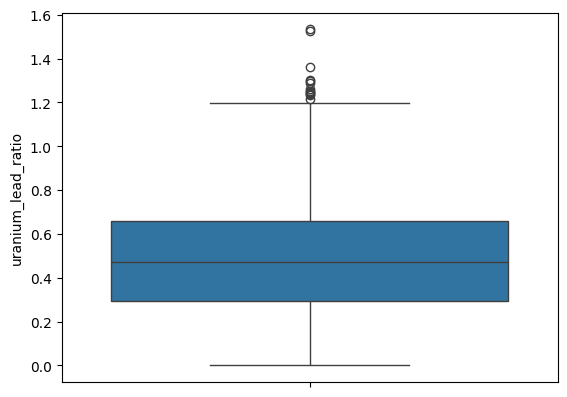

In [44]:
sns.boxplot(df['uranium_lead_ratio'])
# Here we can see some outliers presence that the values above 1.2
# let's check any relation between these outliers with the other columns

In [45]:
len(df[df['uranium_lead_ratio']>1.2])/len(df)*100

0.29558890404729427

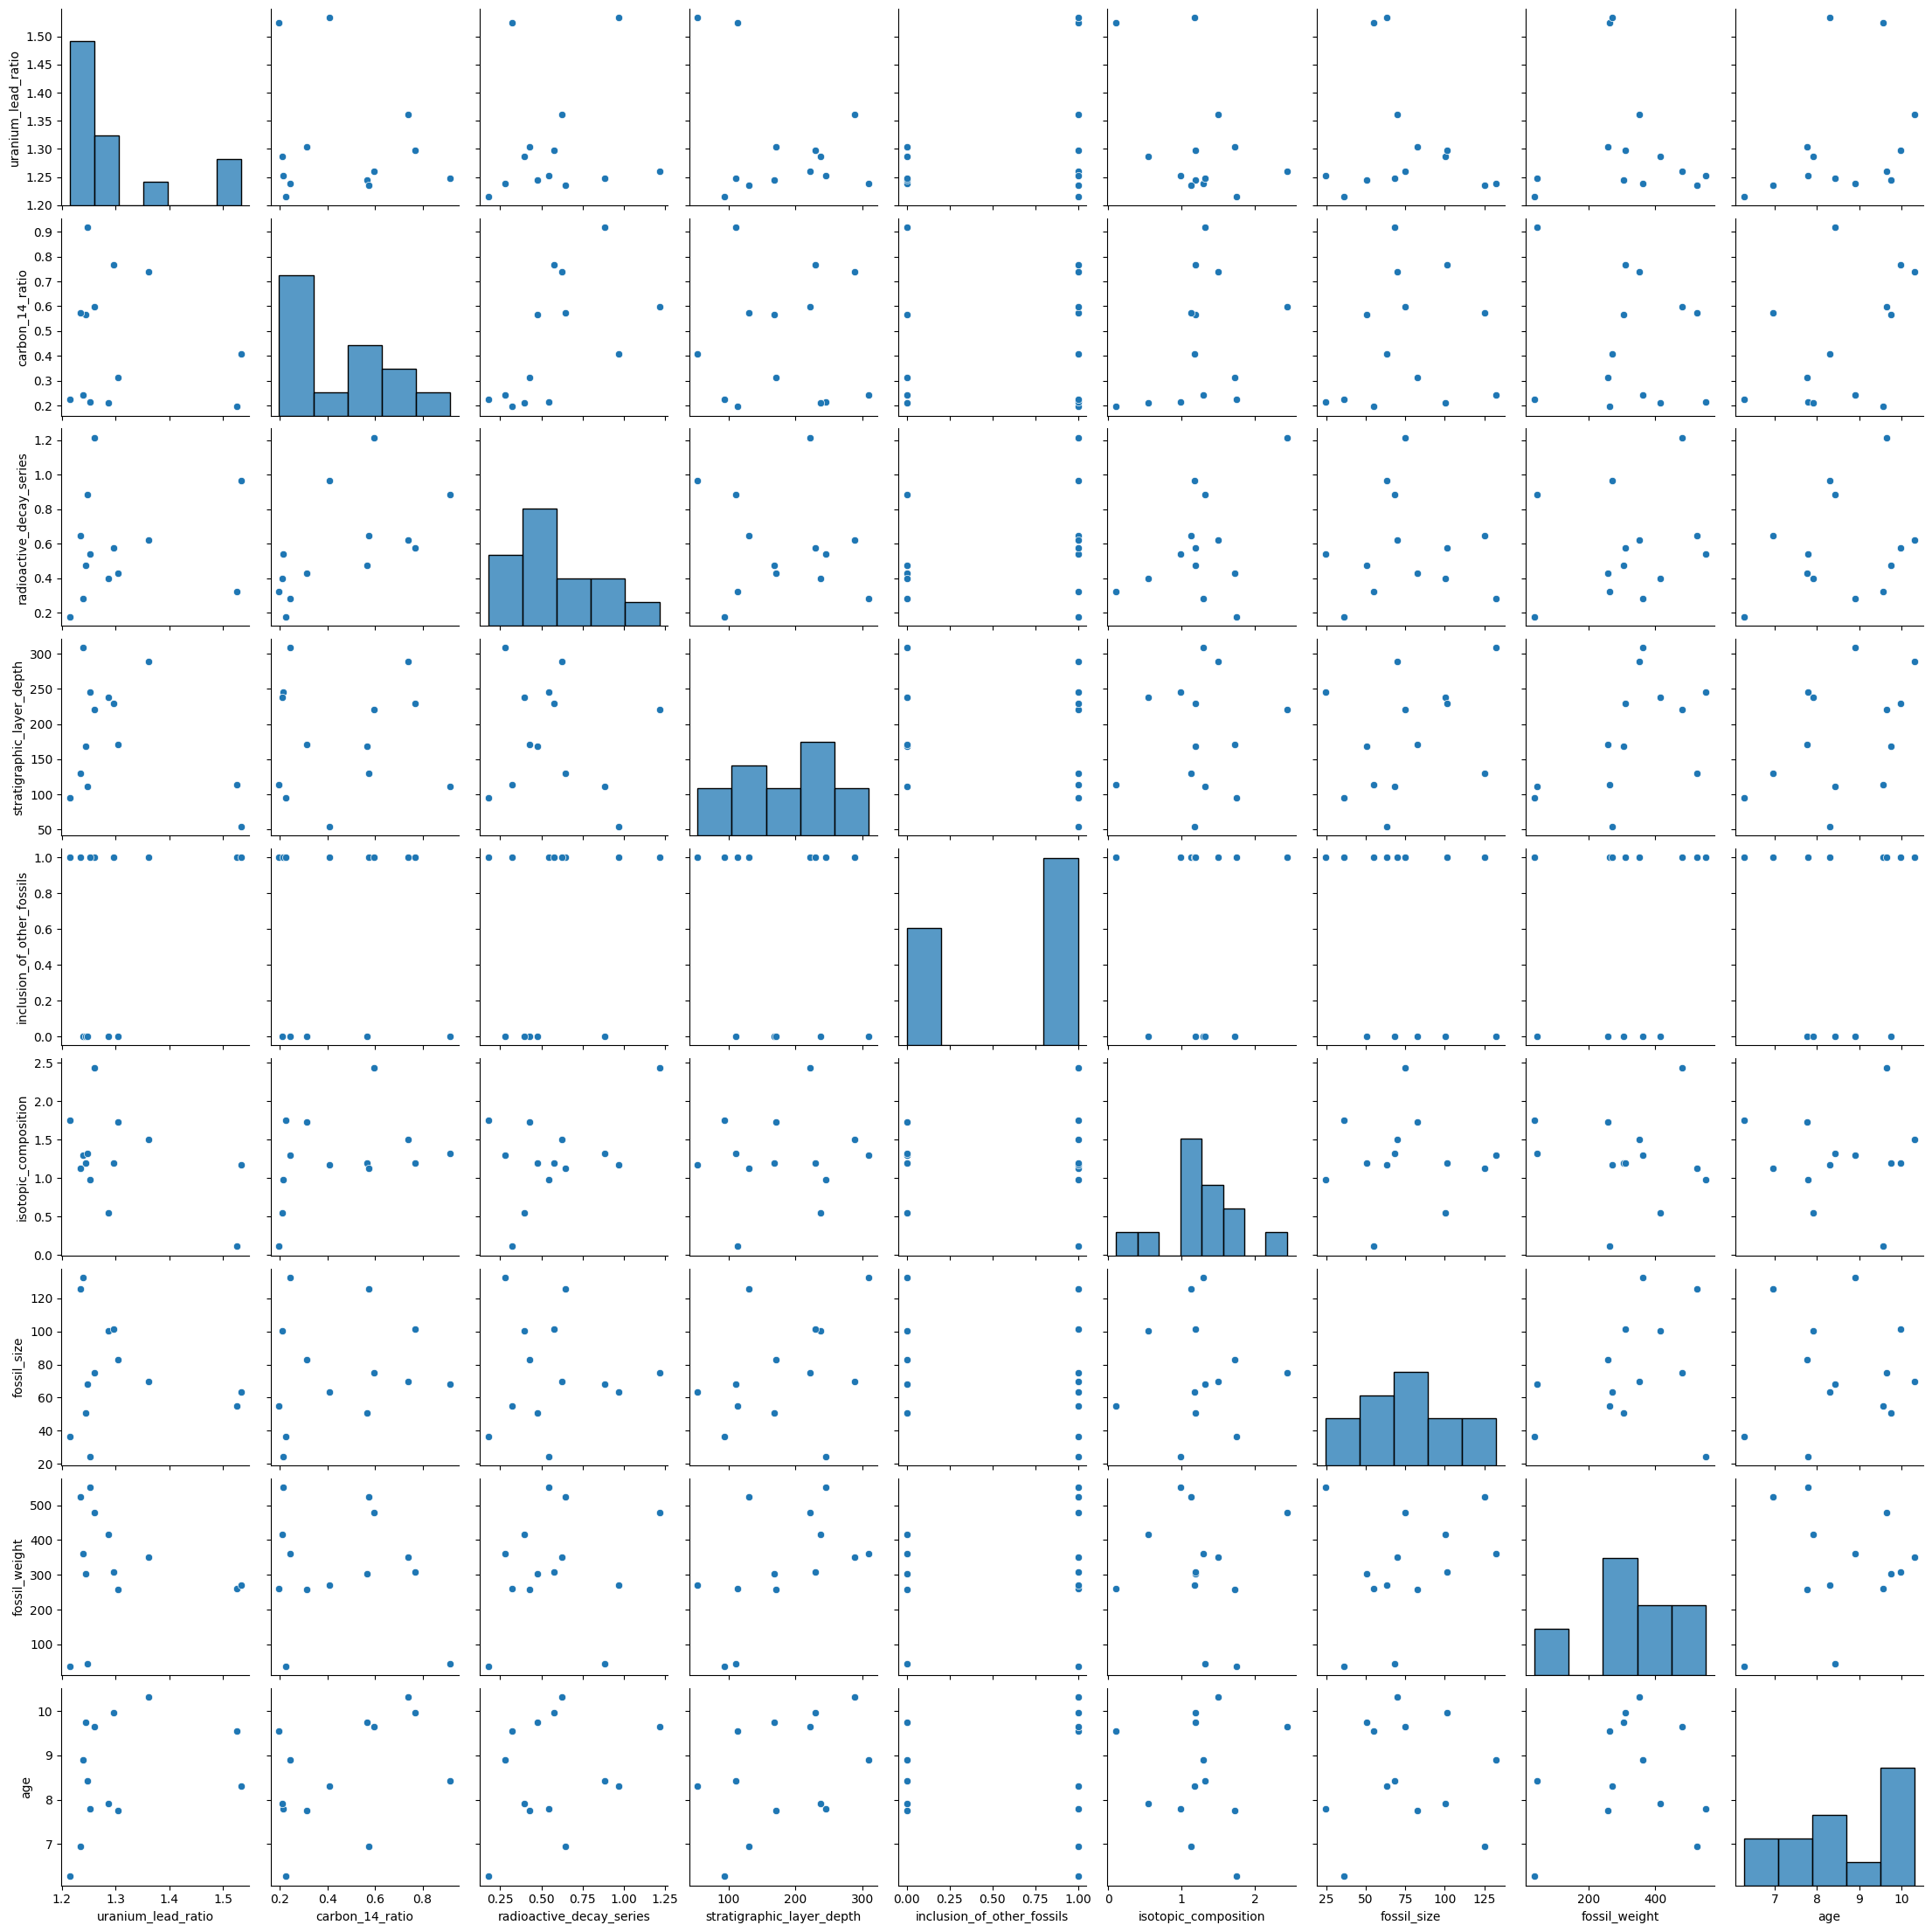

In [46]:
sns.pairplot(df[df['uranium_lead_ratio']>1.2])

In [47]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




In [48]:
for i in df_cat.columns:
    print(i)
    a=df[df['uranium_lead_ratio']>1.2][i].value_counts()/len(df[df['uranium_lead_ratio']>1.2])*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian      15.384615
Triassic      15.384615
Devonian      15.384615
Permian       15.384615
Paleogene      7.692308
Cretaceous     7.692308
Neogene        7.692308
Ordovician     7.692308
Jurassic       7.692308
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      76.923077
Reversed polarity    23.076923
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Shale        38.461538
Sandstone    38.461538
Limestone    23.076923
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    53.846154
Top       23.076923
Middle    23.076923
Name: count, dtype: float64




Carbon_14_ratio

<Axes: ylabel='carbon_14_ratio'>

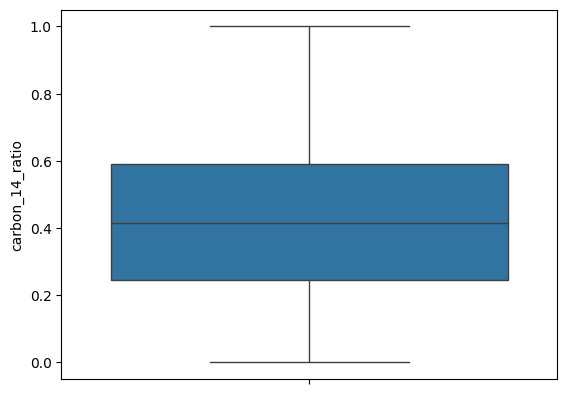

In [49]:
sns.boxplot(df_num['carbon_14_ratio'])

radioactive_decay_series

<Axes: ylabel='radioactive_decay_series'>

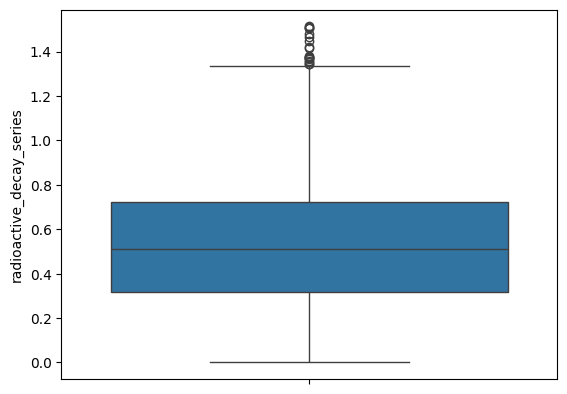

In [50]:
sns.boxplot(df_num['radioactive_decay_series'])

In [51]:
IQR = df['radioactive_decay_series'].quantile(0.75) - df['radioactive_decay_series'].quantile(0.25)
df['radioactive_decay_series'].quantile(0.75)+1.5*IQR # findig UL of Boxplot

1.3343514951047242

In [52]:
len(df[df['radioactive_decay_series']>1.33])/len(df)*100

0.45475216007276037

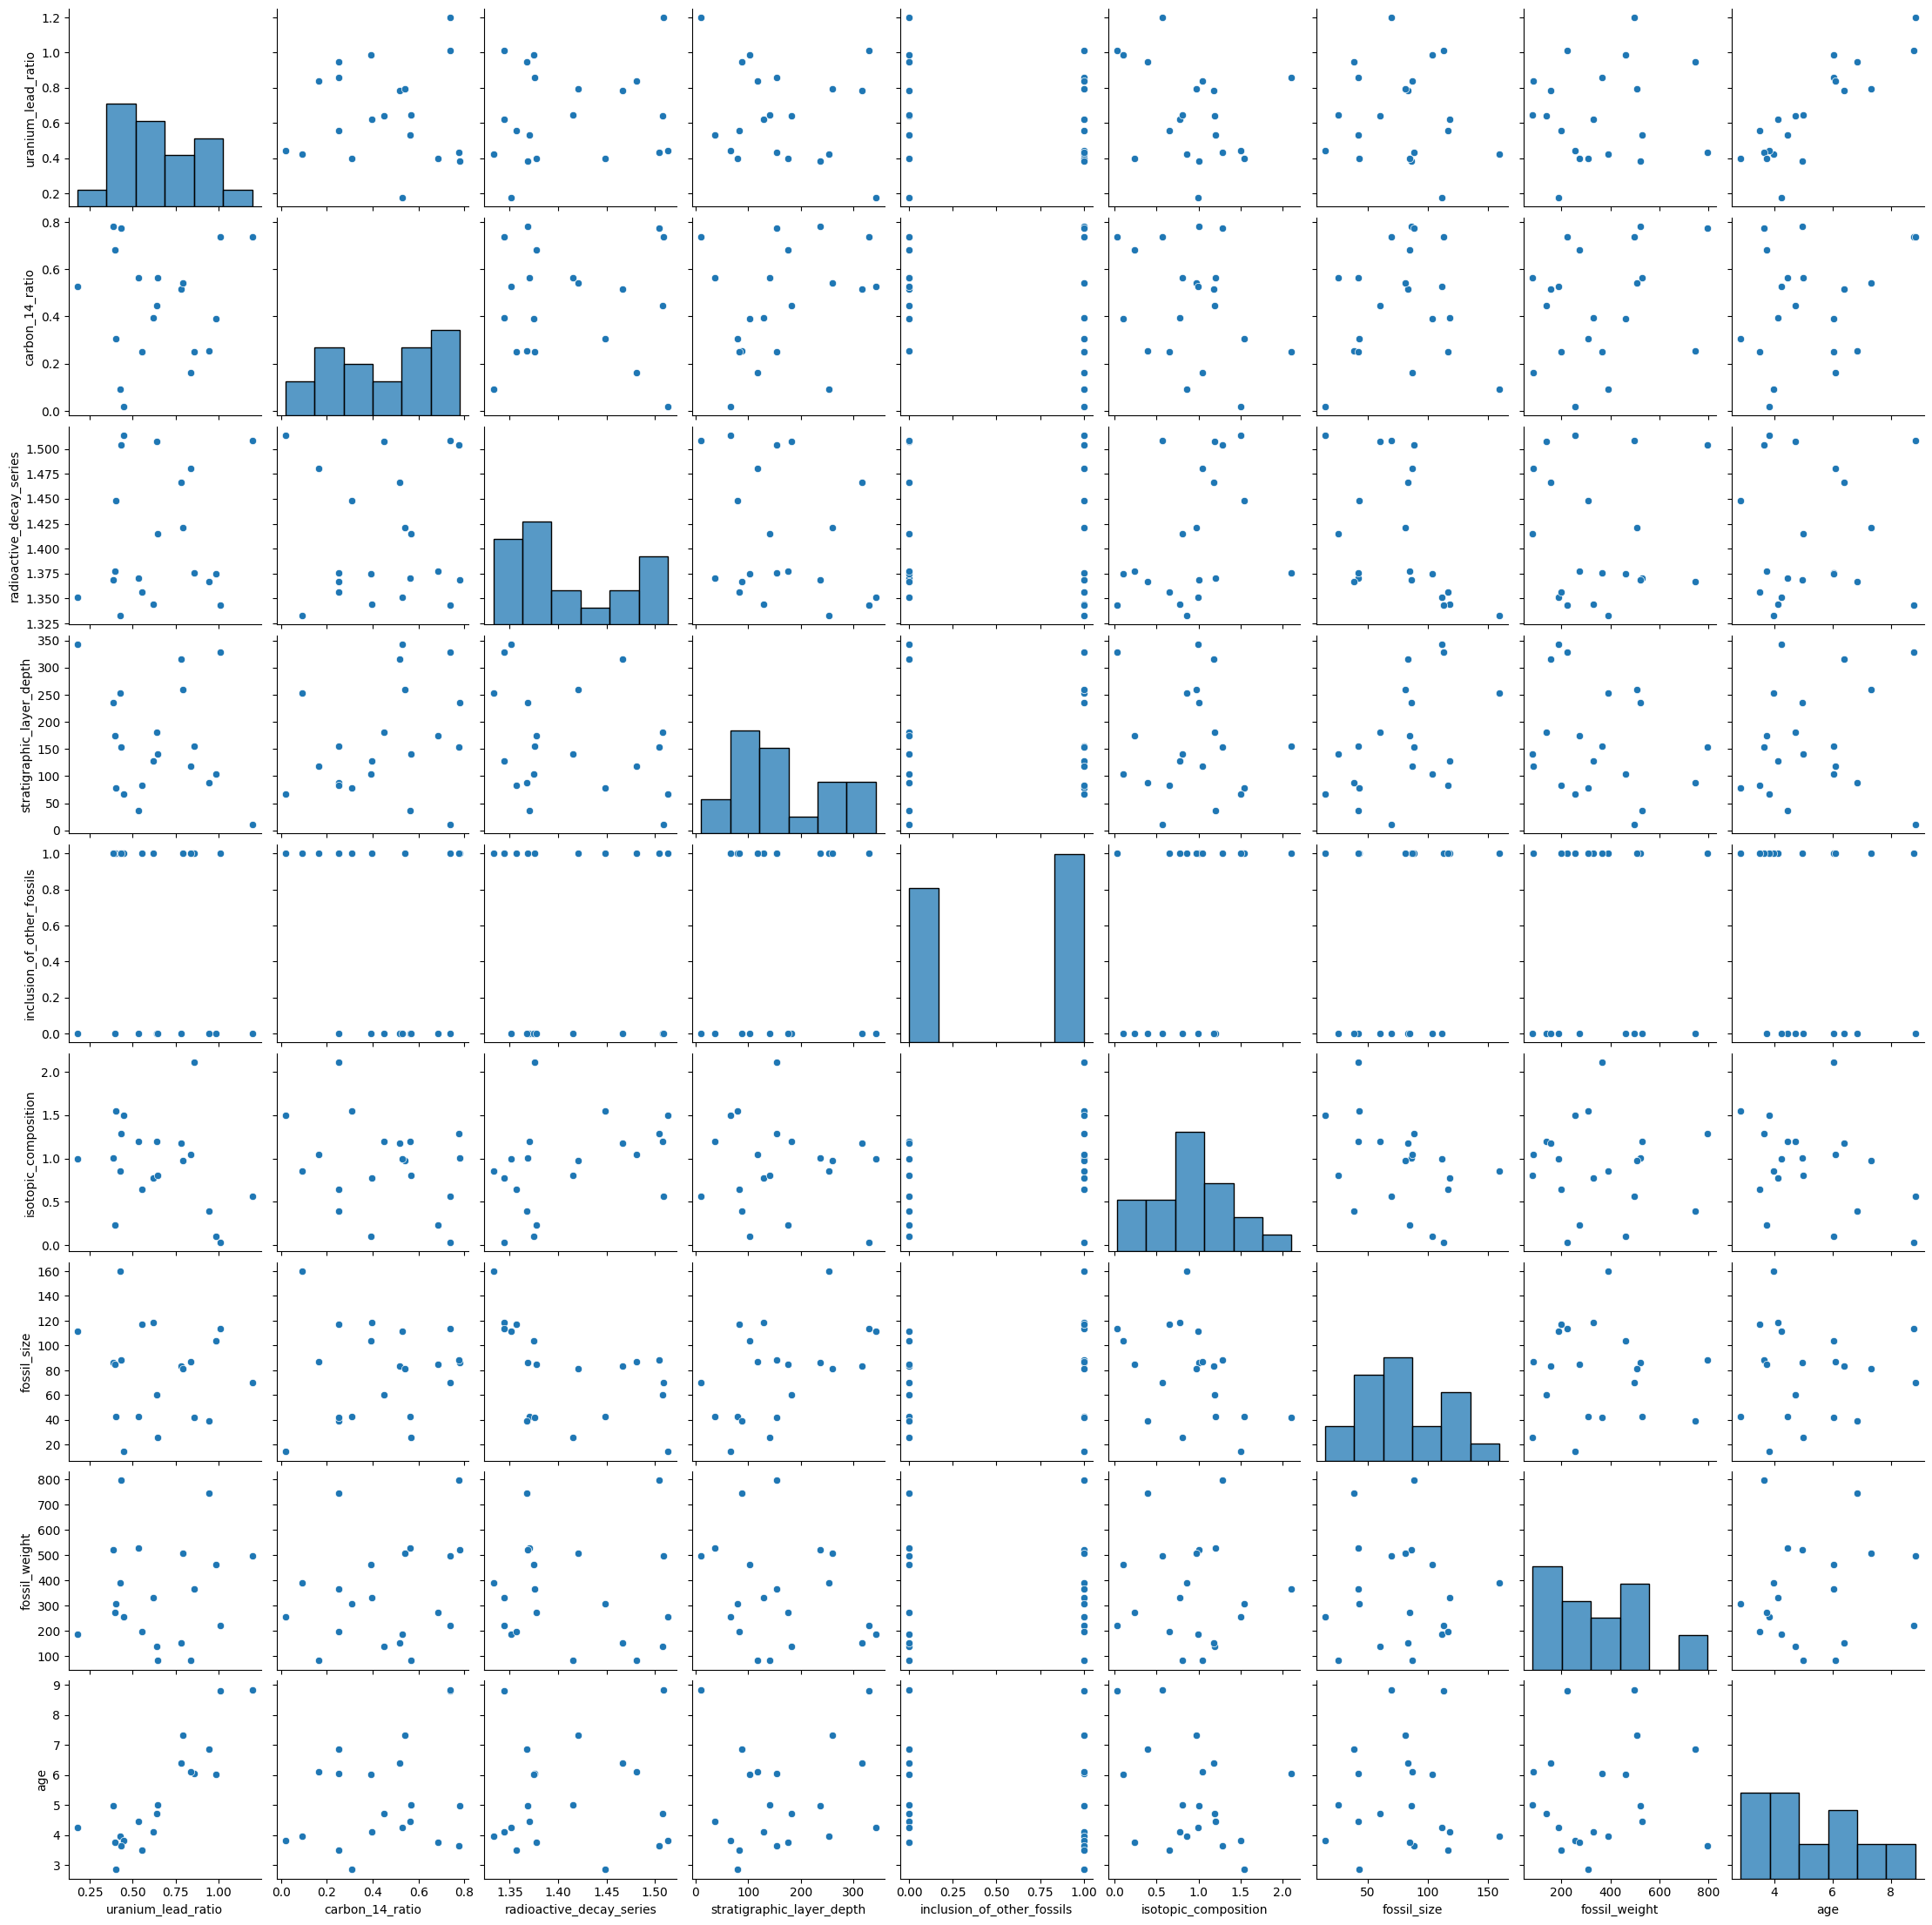

In [53]:
sns.pairplot(df[df['radioactive_decay_series']>1.33])

In [54]:
for i in df_cat.columns:
    print(i)
    a=df[df['radioactive_decay_series']>1.33][i].value_counts()/len(df[df['radioactive_decay_series']>1.33])*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian      20.0
Cretaceous    15.0
Permian       15.0
Triassic      10.0
Ordovician    10.0
Devonian      10.0
Neogene       10.0
Paleogene      5.0
Jurassic       5.0
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      55.0
Reversed polarity    45.0
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       40.0
Shale           30.0
Limestone       25.0
Conglomerate     5.0
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    50.0
Middle    35.0
Top       15.0
Name: count, dtype: float64




In [55]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()


geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




Straigraphic_layer_depth

<Axes: ylabel='stratigraphic_layer_depth'>

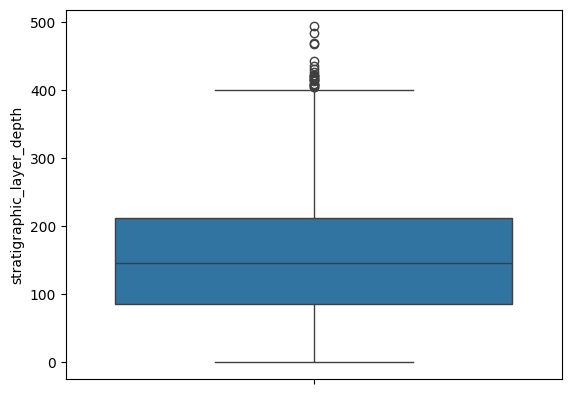

In [56]:
sns.boxplot(df_num['stratigraphic_layer_depth'])

In [57]:
len(df[df['stratigraphic_layer_depth']>400])/len(df)*100

0.5457025920873124

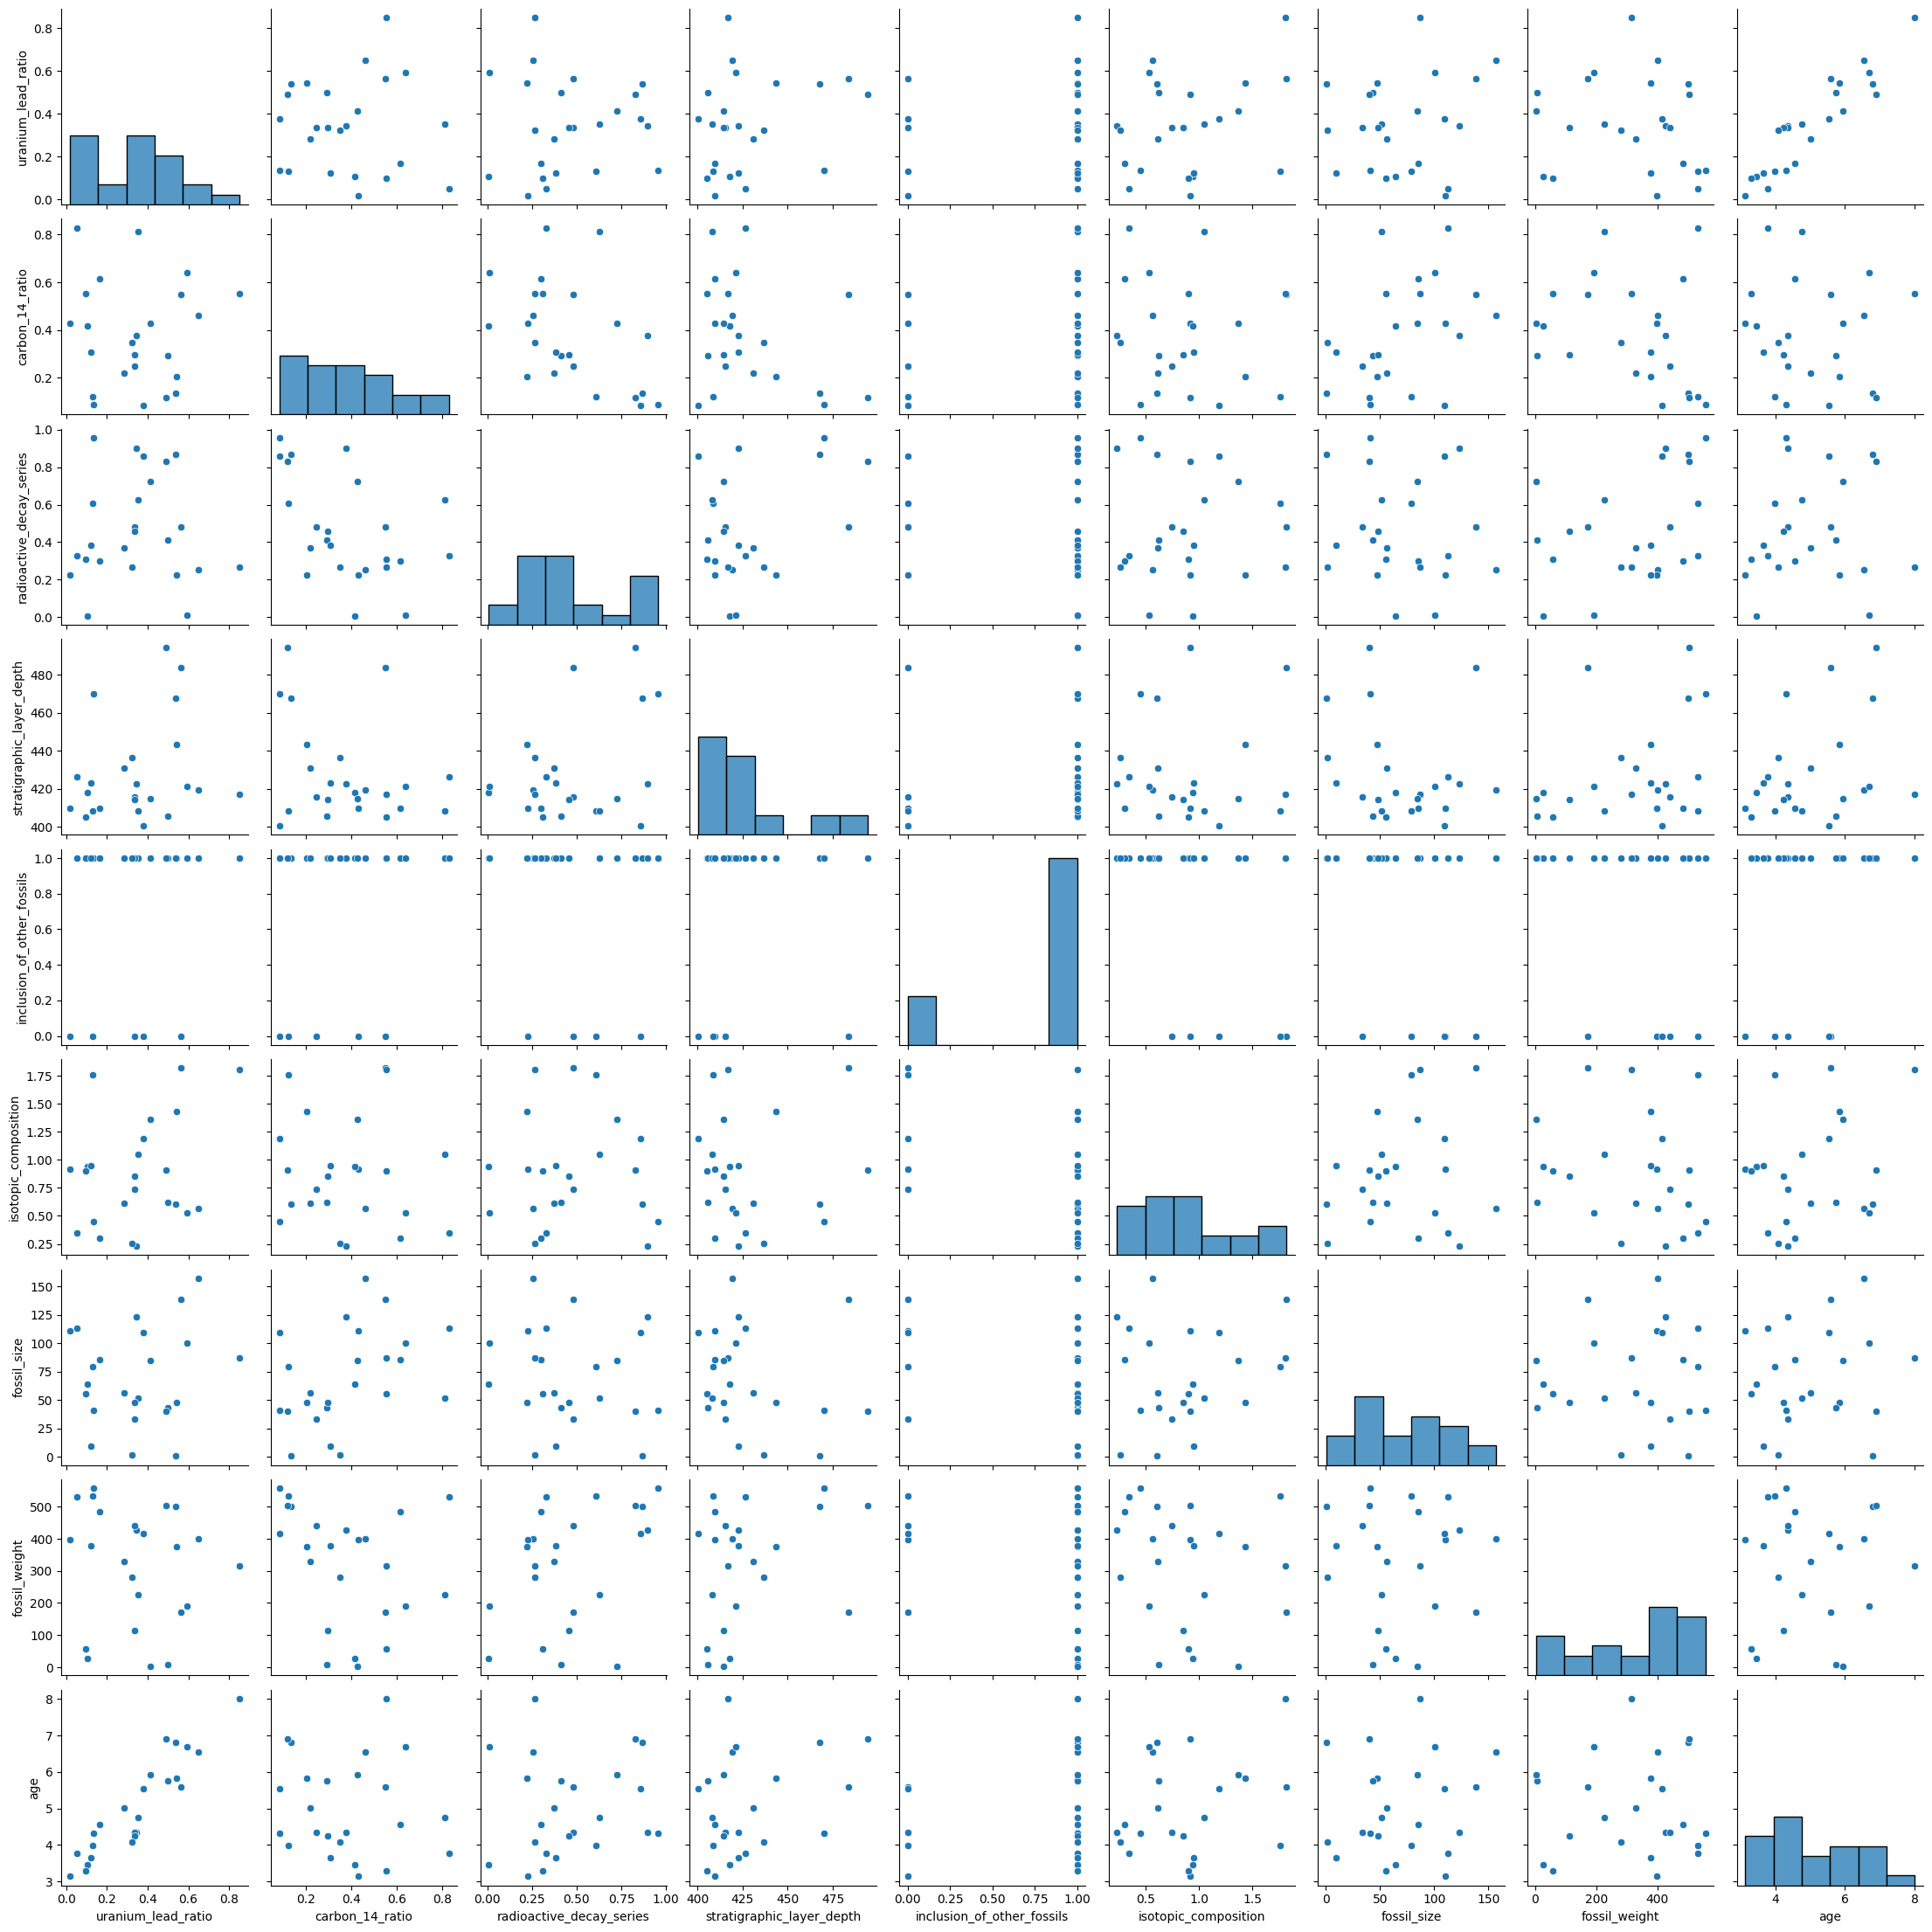

In [58]:
sns.pairplot(df[df['stratigraphic_layer_depth']>400])

In [59]:
for i in df_cat.columns:
    print(i)
    a=df[df['stratigraphic_layer_depth']>400][i].value_counts()/len(df[df['stratigraphic_layer_depth']>400])*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian      33.333333
Jurassic      20.833333
Cretaceous    12.500000
Triassic       8.333333
Neogene        8.333333
Paleogene      4.166667
Permian        4.166667
Silurian       4.166667
Devonian       4.166667
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      83.333333
Reversed polarity    16.666667
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       33.333333
Shale           25.000000
Limestone       25.000000
Conglomerate    16.666667
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    75.000000
Middle    16.666667
Top        8.333333
Name: count, dtype: float64




In [60]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




Isotopic_composition

<Axes: ylabel='isotopic_composition'>

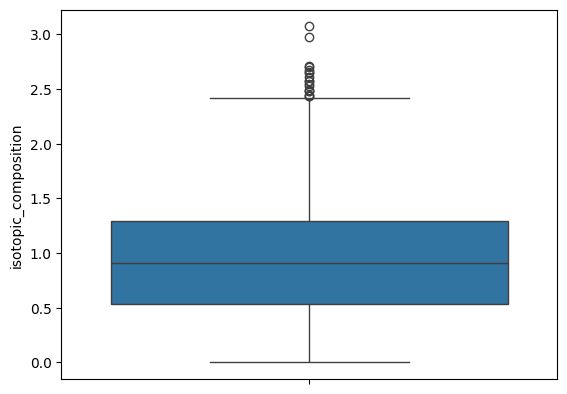

In [61]:
sns.boxplot(df_num['isotopic_composition'])

In [62]:
IQR = df['isotopic_composition'].quantile(0.75) - df['isotopic_composition'].quantile(0.25)
df['isotopic_composition'].quantile(0.75)+1.5*IQR # findig UL of Boxplot

2.4229880201766214

In [63]:
len(df[df['isotopic_composition']>2.42])/len(df)*100

0.4092769440654843

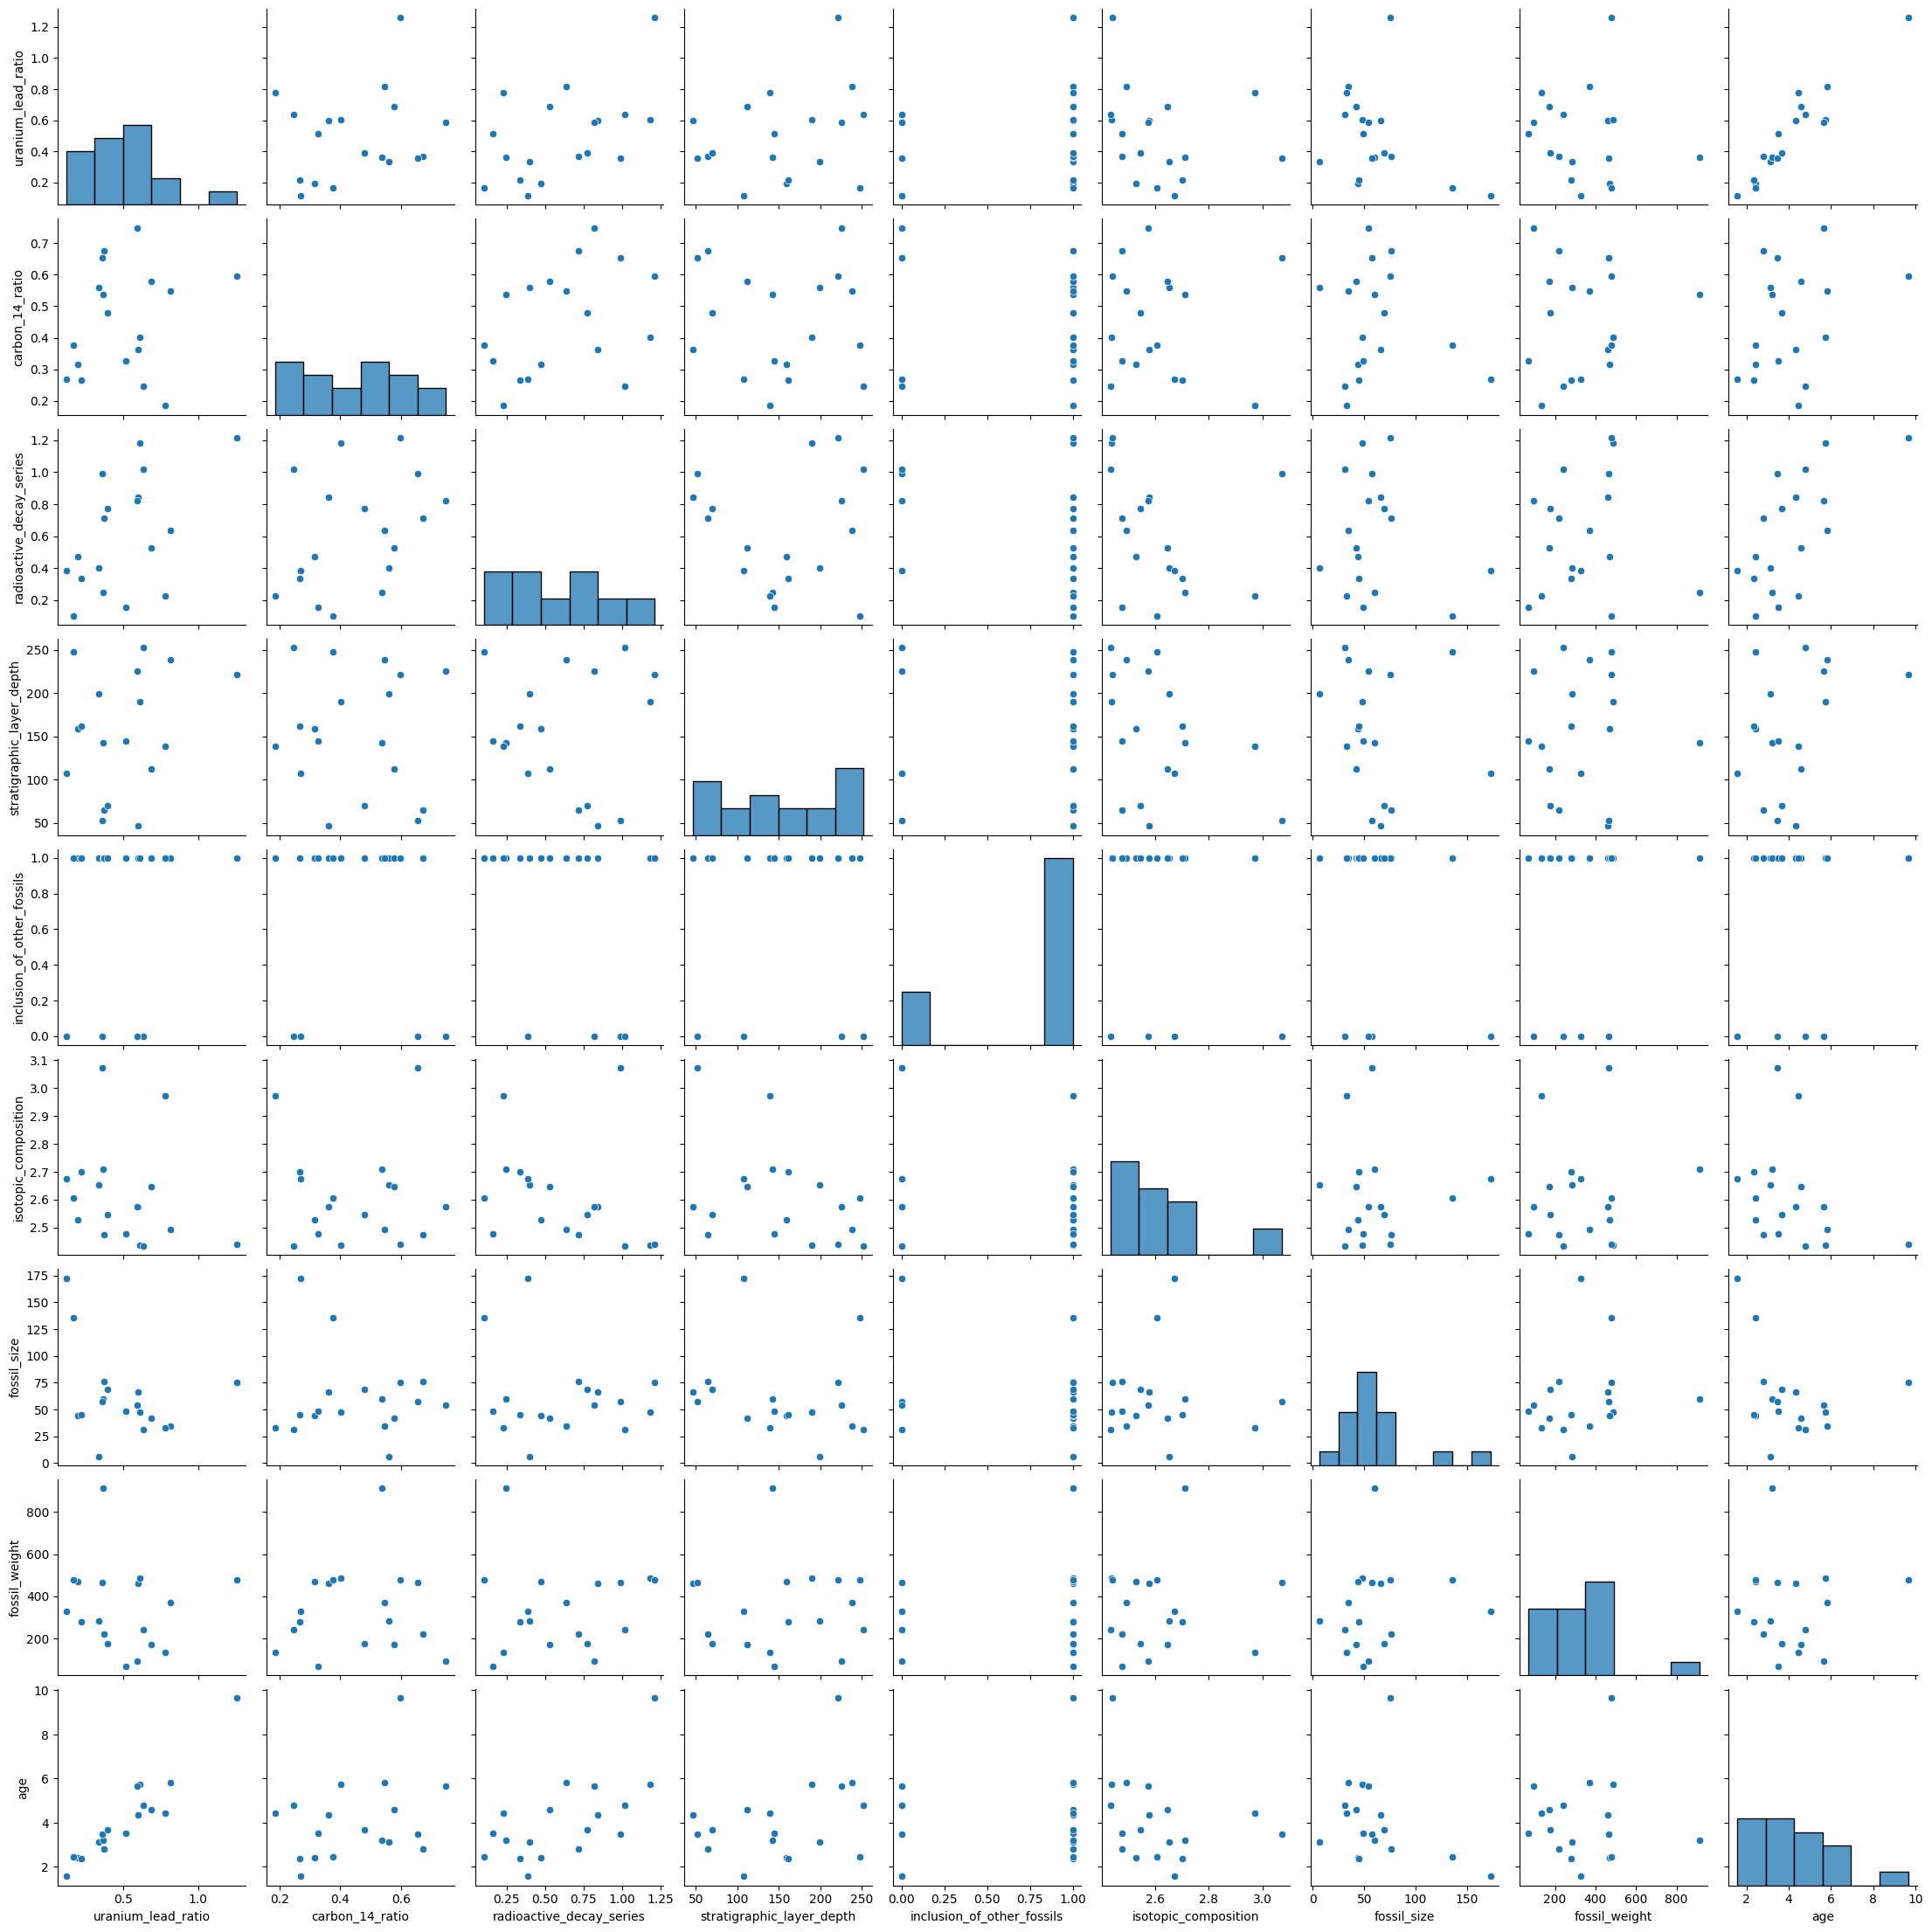

In [64]:
sns.pairplot(df[df['isotopic_composition']>2.42])

In [65]:
for i in df_cat.columns:
    print(i)
    a=df[df['isotopic_composition']>2.42][i].value_counts()/len(df[df['isotopic_composition']>2.42])*100
    print(a)
    print()
    print()

geological_period
geological_period
Jurassic      22.222222
Cambrian      22.222222
Triassic      16.666667
Ordovician    11.111111
Paleogene     11.111111
Devonian      11.111111
Cretaceous     5.555556
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      61.111111
Reversed polarity    38.888889
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone    61.111111
Limestone    22.222222
Shale        16.666667
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Middle    38.888889
Bottom    38.888889
Top       22.222222
Name: count, dtype: float64




In [66]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




fossil_size

<Axes: ylabel='fossil_size'>

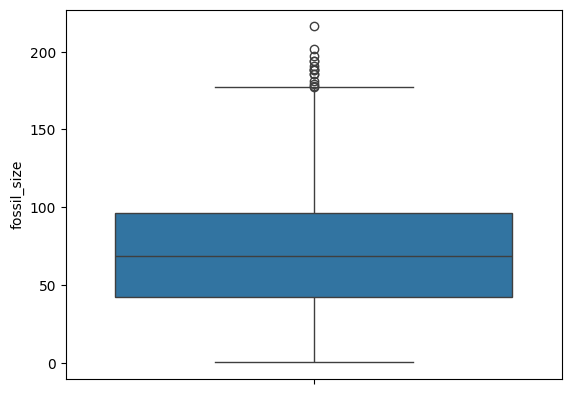

In [67]:
sns.boxplot(df_num['fossil_size'])

In [68]:
IQR = df['fossil_size'].quantile(0.75) - df['fossil_size'].quantile(0.25)
df['fossil_size'].quantile(0.75)+1.5*IQR # findig UL of Boxplot

177.36875

In [69]:
len(df[df['fossil_size']>177.3])/len(df)*100

0.34106412005457026

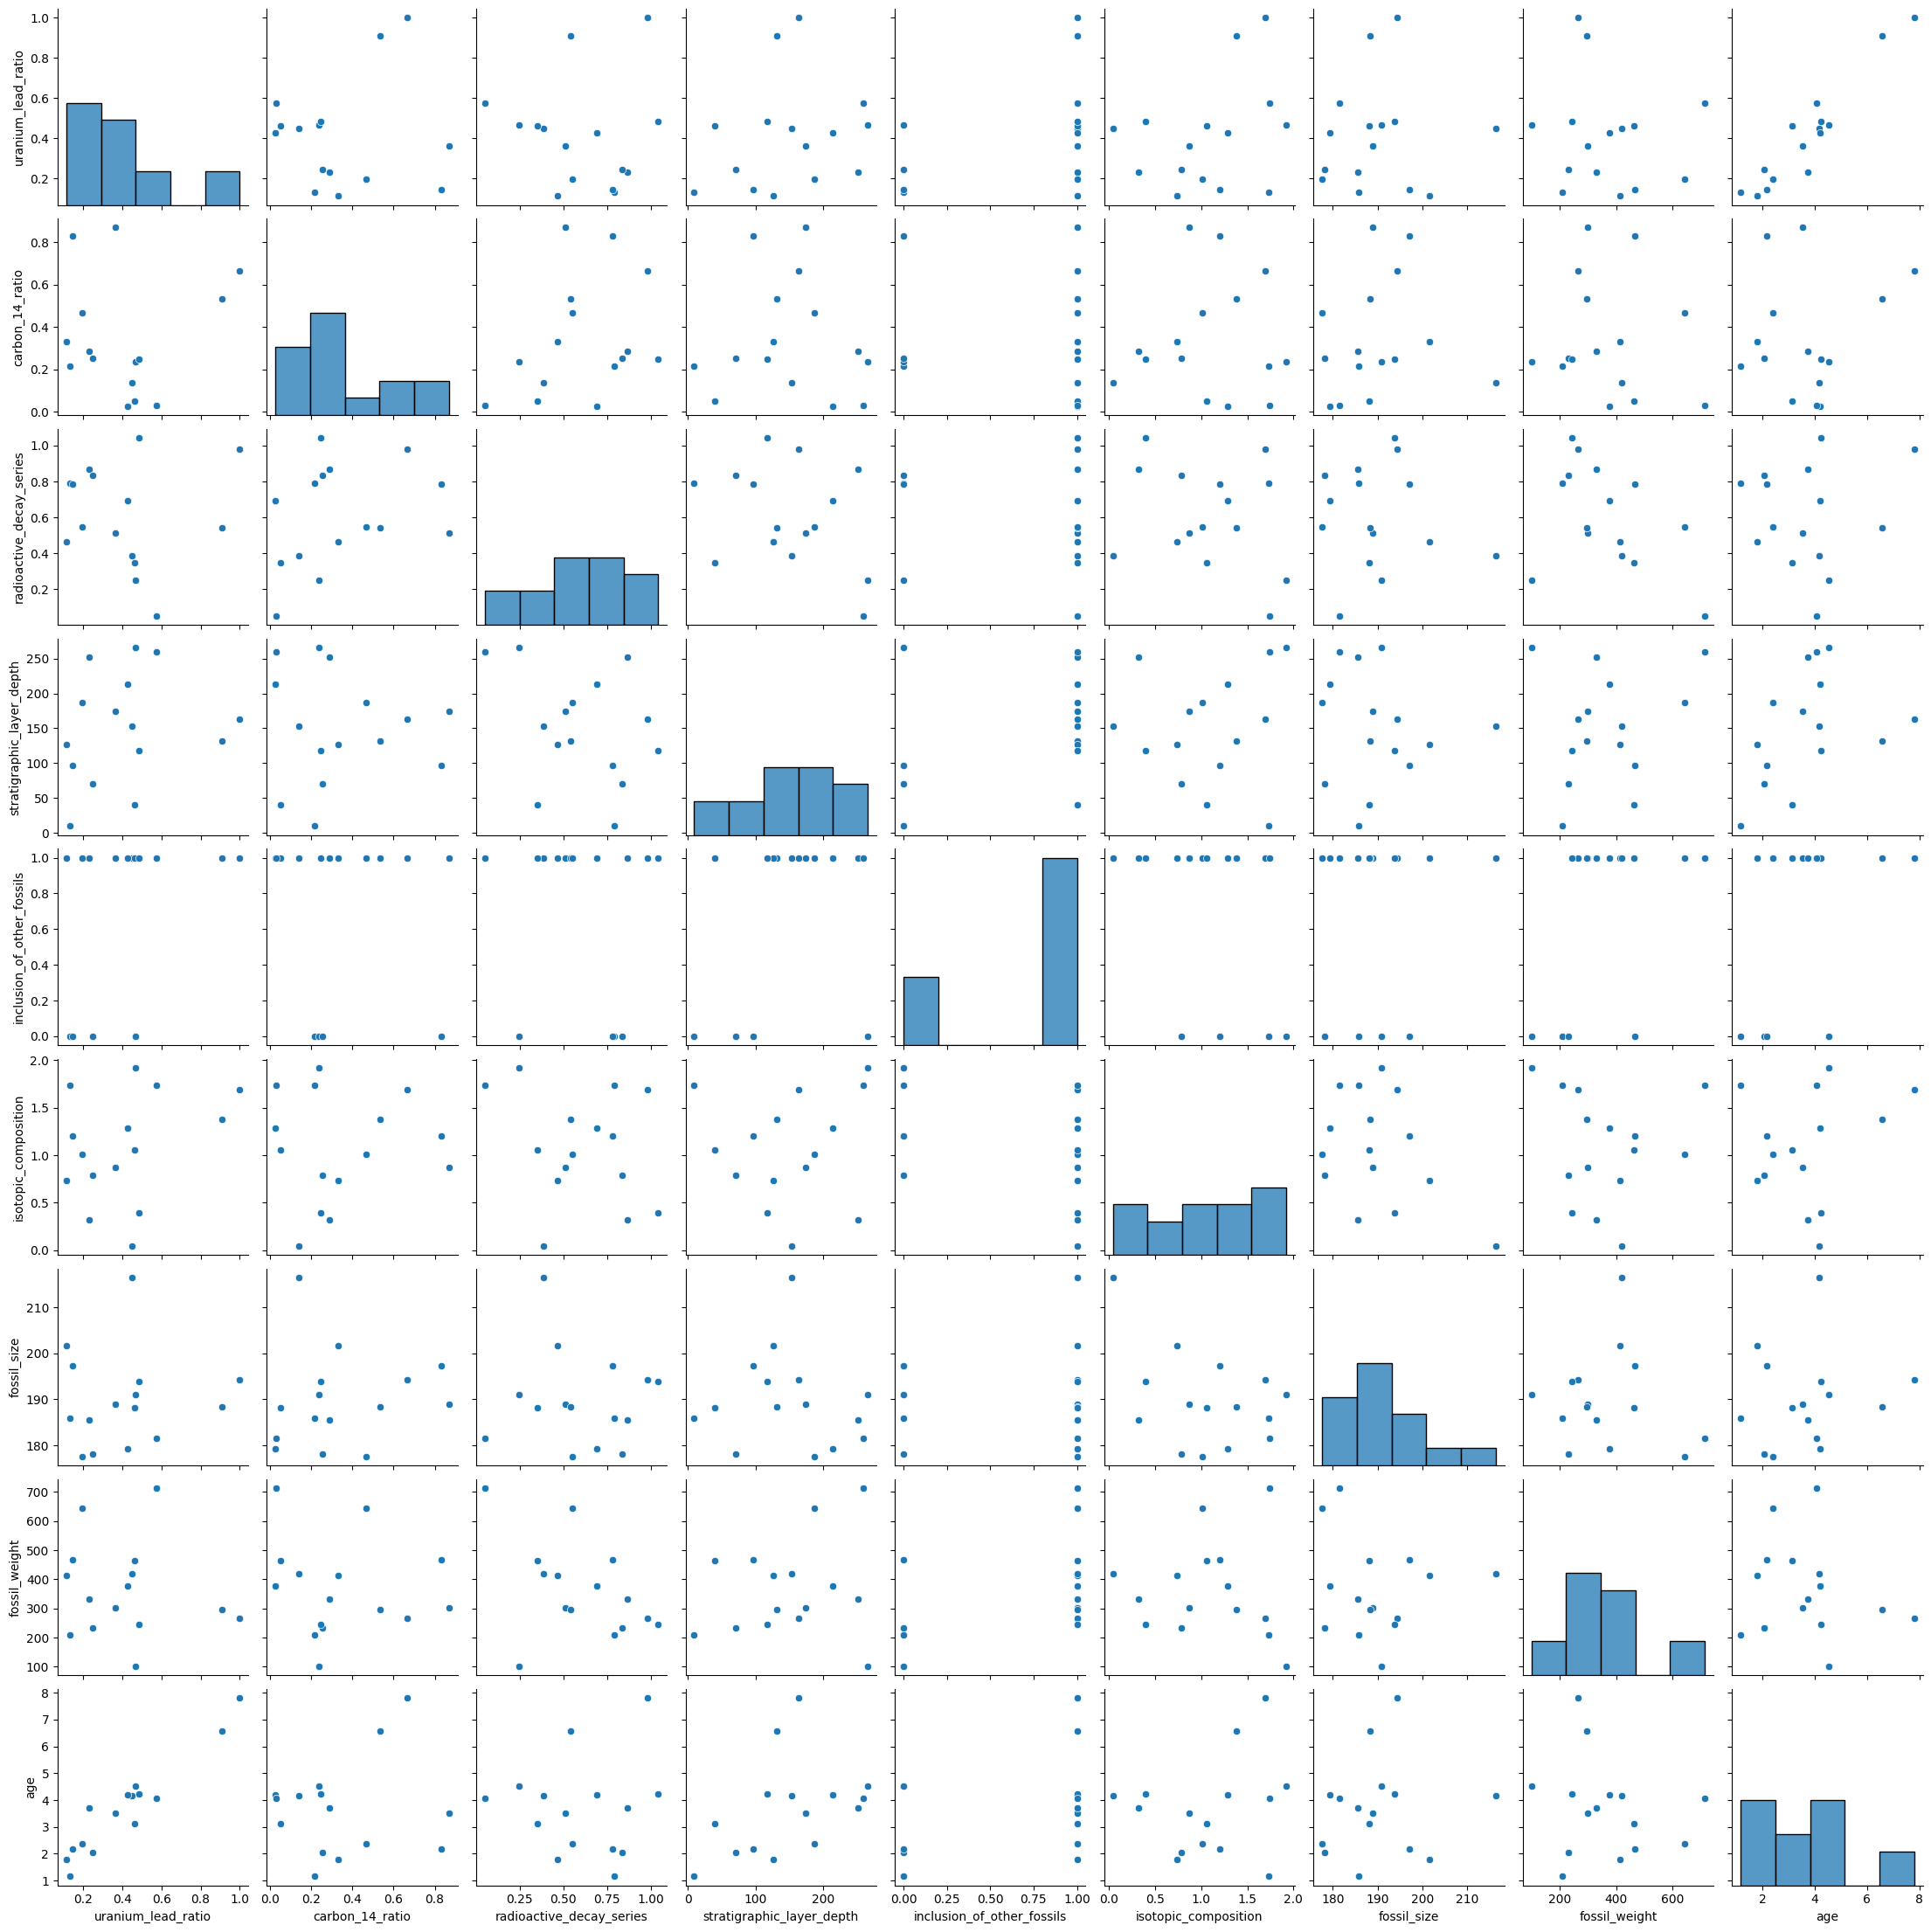

In [70]:
sns.pairplot(df[df['fossil_size']>177.3])

In [71]:
for i in df_cat.columns:
    print(i)
    a=df[df['fossil_size']>177.3][i].value_counts()/len(df[df['fossil_size']>177.3])*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         26.666667
Jurassic         20.000000
Devonian         13.333333
Cretaceous       13.333333
Neogene           6.666667
Paleogene         6.666667
Carboniferous     6.666667
Permian           6.666667
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      80.0
Reversed polarity    20.0
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Limestone       46.666667
Sandstone       26.666667
Shale           20.000000
Conglomerate     6.666667
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    53.333333
Middle    40.000000
Top        6.666667
Name: count, dtype: float64




In [72]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




fossil_weight

<Axes: ylabel='fossil_weight'>

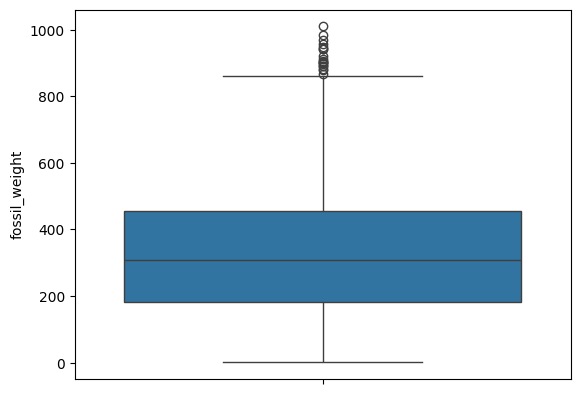

In [73]:
sns.boxplot(df_num['fossil_weight'])

In [74]:
IQR = df['fossil_weight'].quantile(0.75) - df['fossil_weight'].quantile(0.25)
df['fossil_weight'].quantile(0.75)+1.5*IQR # findig UL of Boxplot

867.22875

In [75]:
len(df[df['fossil_weight']>867.2])/len(df)*100

0.43201455206912237

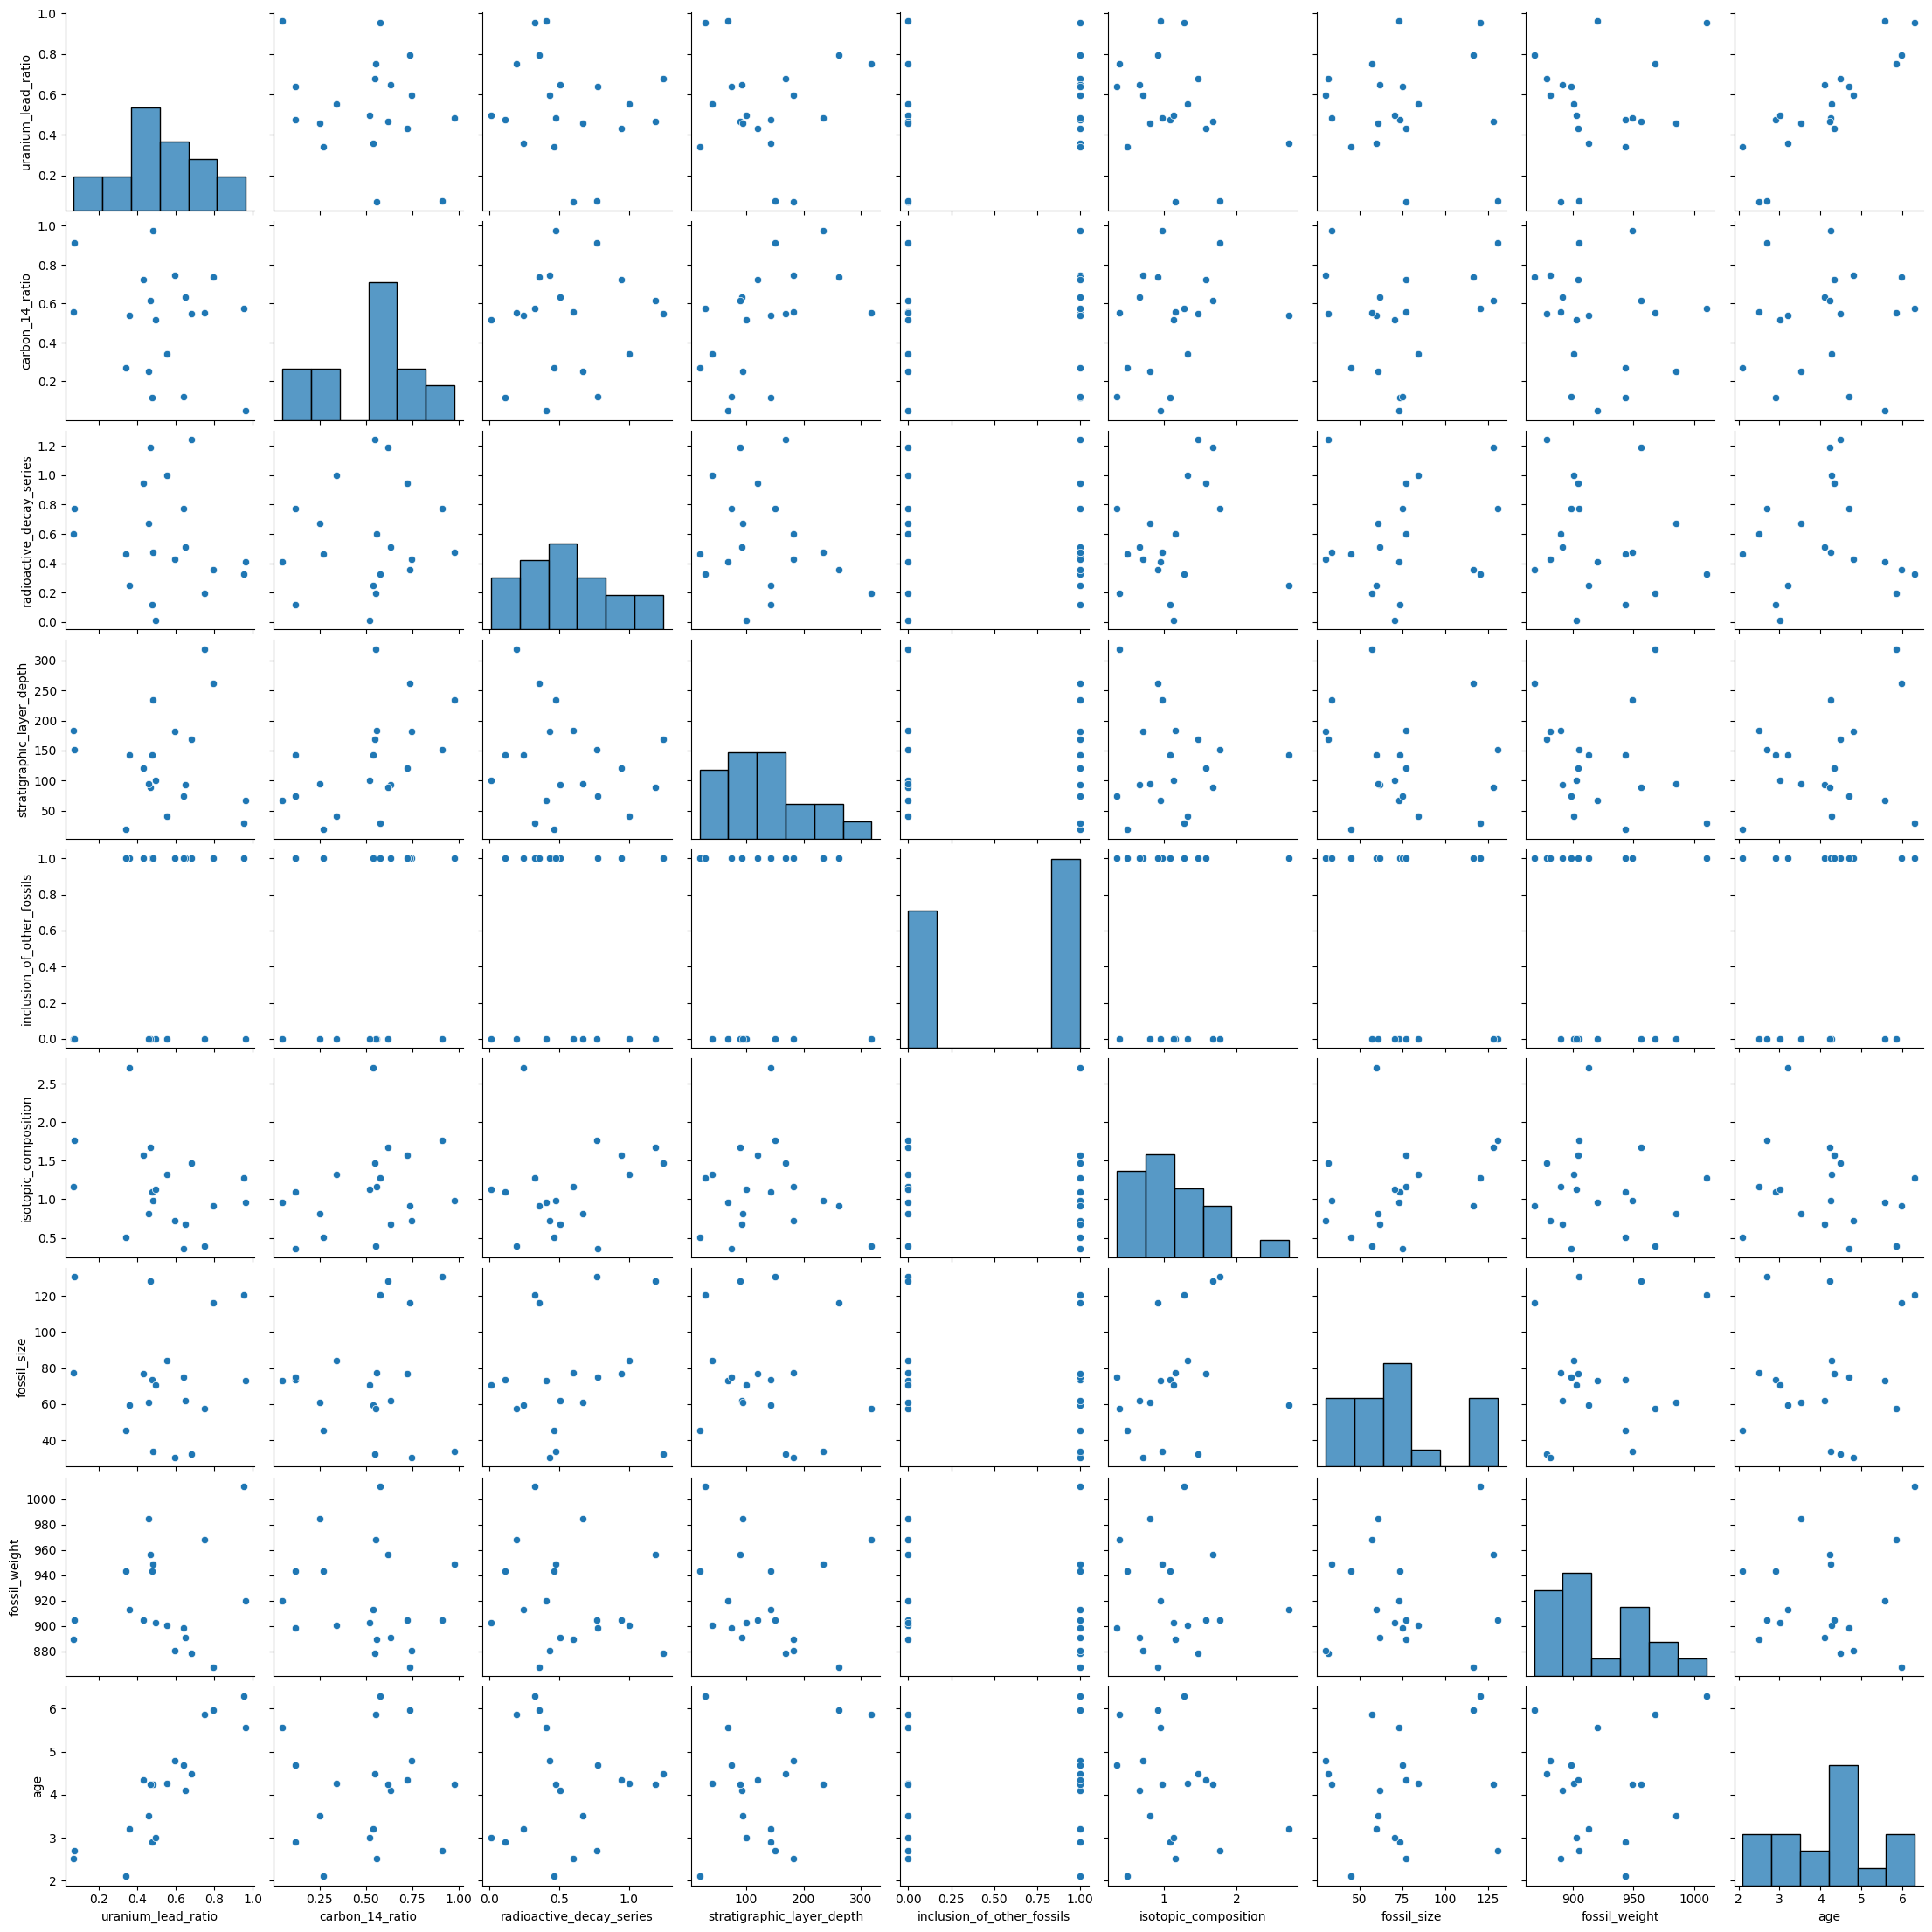

In [76]:
sns.pairplot(df[df['fossil_weight']>867.2])

In [77]:
for i in df_cat.columns:
    print(i)
    a=df[df['fossil_weight']>867.2][i].value_counts()/len(df[df['fossil_weight']>867.2])*100
    print(a)
    print()
    print()

geological_period
geological_period
Paleogene     26.315789
Cambrian      21.052632
Devonian      15.789474
Permian       10.526316
Cretaceous    10.526316
Triassic       5.263158
Jurassic       5.263158
Neogene        5.263158
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      63.157895
Reversed polarity    36.842105
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       47.368421
Limestone       26.315789
Conglomerate    15.789474
Shale           10.526316
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    47.368421
Middle    36.842105
Top       15.789474
Name: count, dtype: float64




In [78]:
for i in df_cat.columns: # for every categorical column printing percentage of count of sub classes in the categorical columns.
    print(i)
    a=df_cat[i].value_counts()/len(df)*100
    print(a)
    print()
    print()

geological_period
geological_period
Cambrian         20.054570
Triassic         15.370623
Cretaceous       13.665302
Devonian         11.323329
Jurassic         11.141428
Paleogene         9.208731
Permian           8.299227
Neogene           7.071396
Ordovician        2.273761
Carboniferous     1.182356
Silurian          0.409277
Name: count, dtype: float64


paleomagnetic_data
paleomagnetic_data
Normal polarity      71.850841
Reversed polarity    28.149159
Name: count, dtype: float64


surrounding_rock_type
surrounding_rock_type
Sandstone       34.038199
Limestone       26.512051
Shale           26.011824
Conglomerate    13.437926
Name: count, dtype: float64


stratigraphic_position
stratigraphic_position
Bottom    60.641201
Middle    28.808549
Top       10.550250
Name: count, dtype: float64




age

<Axes: ylabel='age'>

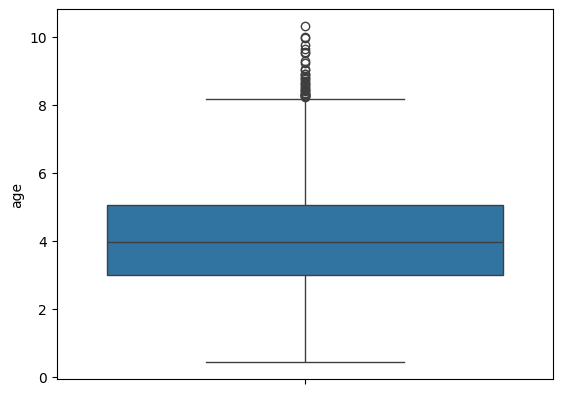

In [79]:
sns.boxplot(df['age'])

# Encoding the Categorical columns

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# importing neccessary libraries to convert categoric variables to numeric
# transforming the categoric column into numeric to build machine learning model

In [81]:
df_cat

geological_period paleomagnetic_data surrounding_rock_type  \
0           Cretaceous    Normal polarity          Conglomerate   
1             Cambrian    Normal polarity             Limestone   
2             Cambrian    Normal polarity                 Shale   
3              Permian    Normal polarity             Limestone   
4             Devonian    Normal polarity                 Shale   
...                ...                ...                   ...   
4393          Jurassic  Reversed polarity             Sandstone   
4394        Cretaceous  Reversed polarity          Conglomerate   
4395          Devonian    Normal polarity          Conglomerate   
4396           Neogene  Reversed polarity             Sandstone   
4397        Cretaceous    Normal polarity             Sandstone   

     stratigraphic_position  
0                    Middle  
1                       Top  
2                    Bottom  
3                    Bottom  
4                       Top  
...                     ...  
4393                 Bottom  
4394                 Bottom  
4395                 Middle  
4396                 Bottom  
4397                    Top  

[4398 rows x 4 columns]

In [82]:
df_enc = pd.DataFrame() # using the label encoder converting cat to numeric
for i in df_cat.columns:
    df_enc[i]=le.fit_transform(df_cat[i])

In [83]:
df_enc

geological_period  paleomagnetic_data  surrounding_rock_type  \
0                     2                   0                      0   
1                     0                   0                      1   
2                     0                   0                      3   
3                     8                   0                      1   
4                     3                   0                      3   
...                 ...                 ...                    ...   
4393                  4                   1                      2   
4394                  2                   1                      0   
4395                  3                   0                      0   
4396                  5                   1                      2   
4397                  2                   0                      2   

      stratigraphic_position  
0                          1  
1                          2  
2                          0  
3                          0  
4                          2  
...                      ...  
4393                       0  
4394                       0  
4395                       1  
4396                       0  
4397                       2  

[4398 rows x 4 columns]

In [84]:
df_num1 = df.select_dtypes(include=np.number)
df_num1

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0               0.738061         0.487707                  0.907884   
1               0.560096         0.341738                  1.121302   
2               0.424773         0.218493                  0.103855   
3               0.349958         0.704649                  0.383617   
4               0.886811         0.777494                  0.593254   
...                  ...              ...                       ...   
4393            0.049660         0.601750                  0.762490   
4394            0.360085         0.215033                  1.002406   
4395            0.464864         0.553313                  0.659639   
4396            0.803338         0.272392                  0.123562   
4397            0.321577         0.348233                  0.265161   

      stratigraphic_layer_depth  inclusion_of_other_fossils  \
0                         91.17                           0   
1                        165.44                           0   
2                        218.98                           1   
3                         51.09                           1   
4                        313.72                           1   
...                         ...                         ...   
4393                     222.54                           1   
4394                     276.70                           1   
4395                      76.77                           1   
4396                     204.82                           1   
4397                     436.61                           1   

      isotopic_composition  fossil_size  fossil_weight     age  
0                 0.915951        50.65         432.00  4.3523  
1                 0.803968        48.85         353.29  4.4112  
2                 0.792441        37.66         371.33  4.3480  
3                 0.074636        39.10         232.84  3.0228  
4                 1.646640        90.84         277.67  6.7217  
...                    ...          ...            ...     ...  
4393              2.247495        91.69         415.13  2.6606  
4394              1.004584        68.97         121.10  4.4850  
4395              0.721947        11.37         288.73  3.2186  
4396              1.496427       132.34         518.31  5.9888  
4397              0.256842         1.70         279.37  4.0809  

[4398 rows x 9 columns]

In [85]:
df_final=pd.concat([df_num1,df_enc],axis=1) # combaining all the numeric and encoded columns into one final data Frame.

In [86]:
df_final

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0               0.738061         0.487707                  0.907884   
1               0.560096         0.341738                  1.121302   
2               0.424773         0.218493                  0.103855   
3               0.349958         0.704649                  0.383617   
4               0.886811         0.777494                  0.593254   
...                  ...              ...                       ...   
4393            0.049660         0.601750                  0.762490   
4394            0.360085         0.215033                  1.002406   
4395            0.464864         0.553313                  0.659639   
4396            0.803338         0.272392                  0.123562   
4397            0.321577         0.348233                  0.265161   

      stratigraphic_layer_depth  inclusion_of_other_fossils  \
0                         91.17                           0   
1                        165.44                           0   
2                        218.98                           1   
3                         51.09                           1   
4                        313.72                           1   
...                         ...                         ...   
4393                     222.54                           1   
4394                     276.70                           1   
4395                      76.77                           1   
4396                     204.82                           1   
4397                     436.61                           1   

      isotopic_composition  fossil_size  fossil_weight     age  \
0                 0.915951        50.65         432.00  4.3523   
1                 0.803968        48.85         353.29  4.4112   
2                 0.792441        37.66         371.33  4.3480   
3                 0.074636        39.10         232.84  3.0228   
4                 1.646640        90.84         277.67  6.7217   
...                    ...          ...            ...     ...   
4393              2.247495        91.69         415.13  2.6606   
4394              1.004584        68.97         121.10  4.4850   
4395              0.721947        11.37         288.73  3.2186   
4396              1.496427       132.34         518.31  5.9888   
4397              0.256842         1.70         279.37  4.0809   

      geological_period  paleomagnetic_data  surrounding_rock_type  \
0                     2                   0                      0   
1                     0                   0                      1   
2                     0                   0                      3   
3                     8                   0                      1   
4                     3                   0                      3   
...                 ...                 ...                    ...   
4393                  4                   1                      2   
4394                  2                   1                      0   
4395                  3                   0                      0   
4396                  5                   1                      2   
4397                  2                   0                      2   

      stratigraphic_position  
0                          1  
1                          2  
2                          0  
3                          0  
4                          2  
...                      ...  
4393                       0  
4394                       0  
4395                       1  
4396                       0  
4397                       2  

[4398 rows x 13 columns]

# Feature Scaling

In [87]:
df_scaled = pd.DataFrame()

In [88]:
print(df['uranium_lead_ratio'].min())
print(df['uranium_lead_ratio'].max()) # here we can see for the column uranium_lead_ratio the min and max values between 0-1.54

0.0002411924259144
1.5332702643937084


In [89]:
from sklearn.preprocessing import MinMaxScaler # so let's scale them between 0-1
scale = MinMaxScaler(feature_range=(0,1))

df_scaled['uranium_lead_ratio']=pd.DataFrame(scale.fit_transform(df[['uranium_lead_ratio']]))

In [90]:
df_scaled.describe()

uranium_lead_ratio
count         4398.000000
mean             0.317474
std              0.167728
min              0.000000
25%              0.191679
50%              0.308849
75%              0.429066
max              1.000000

In [91]:
print(df['carbon_14_ratio'].min())
print(df['carbon_14_ratio'].max()) #for colum carbon ratio it is already between 0-1 so no need of scaling but lets do to check

0.0002438505437448
0.9999999999


In [92]:
scale = MinMaxScaler(feature_range=(0,1))

df_scaled['carbon_14_ratio']=pd.DataFrame(scale.fit_transform(df[['carbon_14_ratio']]))

In [93]:
df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio
count         4398.000000      4398.000000
mean             0.317474         0.429977
std              0.167728         0.233593
min              0.000000         0.000000
25%              0.191679         0.246085
50%              0.308849         0.415903
75%              0.429066         0.590652
max              1.000000         1.000000

In [94]:
print((df['radioactive_decay_series'].min()))
print(df['radioactive_decay_series'].max())  # the values for this column are less than 0 and to 1.56

7.56371812158374e-05
1.5133254443214954


In [95]:
scale = MinMaxScaler(feature_range=(0,1)) # scale these values between 0-1.

df_scaled['radioactive_decay_series']=pd.DataFrame(scale.fit_transform(df[['radioactive_decay_series']]))

In [96]:
 df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series
count         4398.000000      4398.000000               4398.000000
mean             0.317474         0.429977                  0.351547
std              0.167728         0.233593                  0.190272
min              0.000000         0.000000                  0.000000
25%              0.191679         0.246085                  0.209284
50%              0.308849         0.415903                  0.338182
75%              0.429066         0.590652                  0.478262
max              1.000000         1.000000                  1.000000

In [97]:
print((df['stratigraphic_layer_depth'].min()))
print(df['stratigraphic_layer_depth'].max()) # the min and max values for these column are 0-495 so

0.13
494.2


In [98]:
scale = MinMaxScaler(feature_range=(0,10)) # lets scale these values between 0-10 as it contain high values.

df_scaled['stratigraphic_layer_depth']=pd.DataFrame(scale.fit_transform(df[['stratigraphic_layer_depth']]))

In [99]:
df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         4398.000000      4398.000000               4398.000000   
mean             0.317474         0.429977                  0.351547   
std              0.167728         0.233593                  0.190272   
min              0.000000         0.000000                  0.000000   
25%              0.191679         0.246085                  0.209284   
50%              0.308849         0.415903                  0.338182   
75%              0.429066         0.590652                  0.478262   
max              1.000000         1.000000                  1.000000   

       stratigraphic_layer_depth  
count                4398.000000  
mean                    3.090712  
std                     1.746154  
min                     0.000000  
25%                     1.725666  
50%                     2.952416  
75%                     4.286893  
max                    10.000000

In [100]:
df_num.columns

Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'inclusion_of_other_fossils',
       'isotopic_composition', 'fossil_size', 'fossil_weight', 'age'],
      dtype='object')

In [101]:
print((df['inclusion_of_other_fossils'].min()))  # no need of scaling this column
print(df['inclusion_of_other_fossils'].max())

0
1


In [102]:
print((df['isotopic_composition'].min()))
print(df['isotopic_composition'].max()) # min and max values are 0-3 so lets scale them to 0-1.

0.0002749630652936
3.0714338323637533


In [103]:
scale = MinMaxScaler(feature_range=(0,1))

df_scaled['isotopic_composition']=pd.DataFrame(scale.fit_transform(df[['isotopic_composition']]))

In [104]:
df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         4398.000000      4398.000000               4398.000000   
mean             0.317474         0.429977                  0.351547   
std              0.167728         0.233593                  0.190272   
min              0.000000         0.000000                  0.000000   
25%              0.191679         0.246085                  0.209284   
50%              0.308849         0.415903                  0.338182   
75%              0.429066         0.590652                  0.478262   
max              1.000000         1.000000                  1.000000   

       stratigraphic_layer_depth  isotopic_composition  
count                4398.000000           4398.000000  
mean                    3.090712              0.305435  
std                     1.746154              0.169852  
min                     0.000000              0.000000  
25%                     1.725666              0.173630  
50%                     2.952416              0.294810  
75%                     4.286893              0.419722  
max                    10.000000              1.000000

In [105]:
print((df['fossil_size'].min()))
print(df['fossil_size'].max()) # these values are high so lets scale them to 0-10

0.13
216.39


In [106]:
scale = MinMaxScaler(feature_range=(0,10))

df_scaled['fossil_size']=pd.DataFrame(scale.fit_transform(df[['fossil_size']]))

In [107]:
df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         4398.000000      4398.000000               4398.000000   
mean             0.317474         0.429977                  0.351547   
std              0.167728         0.233593                  0.190272   
min              0.000000         0.000000                  0.000000   
25%              0.191679         0.246085                  0.209284   
50%              0.308849         0.415903                  0.338182   
75%              0.429066         0.590652                  0.478262   
max              1.000000         1.000000                  1.000000   

       stratigraphic_layer_depth  isotopic_composition  fossil_size  
count                4398.000000           4398.000000  4398.000000  
mean                    3.090712              0.305435     3.263315  
std                     1.746154              0.169852     1.727207  
min                     0.000000              0.000000     0.000000  
25%                     1.725666              0.173630     1.958638  
50%                     2.952416              0.294810     3.174651  
75%                     4.286893              0.419722     4.453436  
max                    10.000000              1.000000    10.000000

In [108]:
print((df['fossil_weight'].min()))
print(df['fossil_weight'].max()) # these values are in range of 0-1010 so scale them to 0-10

0.62
1010.09


In [109]:
scale = MinMaxScaler(feature_range=(0,10))

df_scaled['fossil_weight']=pd.DataFrame(scale.fit_transform(df[['fossil_weight']]))

In [110]:
df_scaled.describe()

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
count         4398.000000      4398.000000               4398.000000   
mean             0.317474         0.429977                  0.351547   
std              0.167728         0.233593                  0.190272   
min              0.000000         0.000000                  0.000000   
25%              0.191679         0.246085                  0.209284   
50%              0.308849         0.415903                  0.338182   
75%              0.429066         0.590652                  0.478262   
max              1.000000         1.000000                  1.000000   

       stratigraphic_layer_depth  isotopic_composition  fossil_size  \
count                4398.000000           4398.000000  4398.000000   
mean                    3.090712              0.305435     3.263315   
std                     1.746154              0.169852     1.727207   
min                     0.000000              0.000000     0.000000   
25%                     1.725666              0.173630     1.958638   
50%                     2.952416              0.294810     3.174651   
75%                     4.286893              0.419722     4.453436   
max                    10.000000              1.000000    10.000000   

       fossil_weight  
count    4398.000000  
mean        3.229766  
std         1.852778  
min         0.000000  
25%         1.787349  
50%         3.047540  
75%         4.506325  
max        10.000000

In [111]:
df_scaled.columns

Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size',
       'fossil_weight'],
      dtype='object')

# Model Building

In [112]:
from sklearn.model_selection import train_test_split  # importing necessary libraries to build ANN model.
from sklearn.model_selection import KFold

# import ANN model for regression
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Flatten,LeakyReLU
from tensorflow.keras import optimizers,regularizers
from tensorflow.keras.optimizers import Adam,SGD,RMSprop,Adamax,Nadam
from tensorflow.keras.activations import linear,softplus
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

In [113]:
df_final

uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0               0.738061         0.487707                  0.907884   
1               0.560096         0.341738                  1.121302   
2               0.424773         0.218493                  0.103855   
3               0.349958         0.704649                  0.383617   
4               0.886811         0.777494                  0.593254   
...                  ...              ...                       ...   
4393            0.049660         0.601750                  0.762490   
4394            0.360085         0.215033                  1.002406   
4395            0.464864         0.553313                  0.659639   
4396            0.803338         0.272392                  0.123562   
4397            0.321577         0.348233                  0.265161   

      stratigraphic_layer_depth  inclusion_of_other_fossils  \
0                         91.17                           0   
1                        165.44                           0   
2                        218.98                           1   
3                         51.09                           1   
4                        313.72                           1   
...                         ...                         ...   
4393                     222.54                           1   
4394                     276.70                           1   
4395                      76.77                           1   
4396                     204.82                           1   
4397                     436.61                           1   

      isotopic_composition  fossil_size  fossil_weight     age  \
0                 0.915951        50.65         432.00  4.3523   
1                 0.803968        48.85         353.29  4.4112   
2                 0.792441        37.66         371.33  4.3480   
3                 0.074636        39.10         232.84  3.0228   
4                 1.646640        90.84         277.67  6.7217   
...                    ...          ...            ...     ...   
4393              2.247495        91.69         415.13  2.6606   
4394              1.004584        68.97         121.10  4.4850   
4395              0.721947        11.37         288.73  3.2186   
4396              1.496427       132.34         518.31  5.9888   
4397              0.256842         1.70         279.37  4.0809   

      geological_period  paleomagnetic_data  surrounding_rock_type  \
0                     2                   0                      0   
1                     0                   0                      1   
2                     0                   0                      3   
3                     8                   0                      1   
4                     3                   0                      3   
...                 ...                 ...                    ...   
4393                  4                   1                      2   
4394                  2                   1                      0   
4395                  3                   0                      0   
4396                  5                   1                      2   
4397                  2                   0                      2   

      stratigraphic_position  
0                          1  
1                          2  
2                          0  
3                          0  
4                          2  
...                      ...  
4393                       0  
4394                       0  
4395                       1  
4396                       0  
4397                       2  

[4398 rows x 13 columns]

In [114]:
X=df_final.drop(columns='age')  # building ANN model for the data without scaling
y=df_final['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

In [115]:
X.shape

(4398, 12)

In [116]:
reg_model = Sequential() # building a model

reg_model.add(Dense(32, input_dim=12, activation='relu', kernel_regularizer=l2(0.01)))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))
reg_model.add(Dropout(0.2))
reg_model.add(Dense(1, activation='linear'))

# Compile the model
adam = optimizers.Adam(learning_rate=0.001)
reg_model.compile(optimizer=adam, loss='mse')

# Check the summary of the model
reg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 757 (2.96 KB)
Trainable params: 757 (2.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
history = reg_model.fit(X_train, y_train, epochs=50, batch_size=15, validation_data=(X_val, y_val))

Epoch 1/50
176/176 [==============================] - 1s 3ms/step - loss: 220.4338 - val_loss: 9.2769
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 33.8564 - val_loss: 5.7686
Epoch 3/50
176/176 [==============================] - 0s 3ms/step - loss: 15.9688 - val_loss: 5.4787
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 11.6107 - val_loss: 4.2210
Epoch 5/50
176/176 [==============================] - 0s 3ms/step - loss: 8.6501 - val_loss: 4.0199
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 7.5196 - val_loss: 4.3684
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 6.3671 - val_loss: 3.4989
Epoch 8/50
176/176 [==============================] - 0s 3ms/step - loss: 5.3700 - val_loss: 3.2002
Epoch 9/50
176/176 [==============================] - 0s 2ms/step - loss: 5.1001 - val_loss: 3.1611
Epoch 10/50
176/176 [==============================] - 0s 3ms/step - loss: 5.2011 - val_loss: 3

In [118]:
loss = reg_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

28/28 [==============================] - 0s 1ms/step - loss: 2.0852
Test Loss: 2.085207939147949


In [119]:
# the above model is underfitting as the training loss is 20% where as testing loss is 10% means it is performing good on test
# but not on train data, but we should get train loss less and test loss more so, doing cross validation on using scaled values.

In [120]:
X1 = pd.concat([df_scaled, df_enc], axis=1) #building ANN model with scaled values and Cross validation
y1 = df_final['age']

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through folds
for train_index, val_index in kf.split(X1):
    X_train, X_val = X1.iloc[train_index], X1.iloc[val_index]  # Correct indexing with iloc
    y_train, y_val = y1.iloc[train_index], y1.iloc[val_index]  # Correct indexing with iloc

    # Define your ANN model
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')  # Output layer for regression
    ])

    model.compile(optimizer='adam', loss='mse')

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))



Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 5.9119 - val_loss: 2.1042
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 1.8267 - val_loss: 1.4957
Epoch 3/10
110/110 [==============================] - 0s 2ms/step - loss: 1.1867 - val_loss: 0.7602
Epoch 4/10
110/110 [==============================] - 0s 2ms/step - loss: 0.4757 - val_loss: 0.2517
Epoch 5/10
110/110 [==============================] - 0s 3ms/step - loss: 0.1343 - val_loss: 0.0883
Epoch 6/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0859 - val_loss: 0.0832
Epoch 7/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0717 - val_loss: 0.0931
Epoch 8/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 9/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0609 - val_loss: 0.0587
Epoch 10/10
110/110 [==============================] - 0s 2ms/step - loss: 0.0572 - val_loss: 0.0652

In [121]:
loss = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss}')

28/28 [==============================] - 0s 1ms/step - loss: 0.0519
Validation Loss: 0.05193961039185524


In [122]:
# mostly the train and test loss are same but varies a little more for test loss.

# Model Interpretation

# problem Statement

# Dataset Overview:
**Features:**

**uranium_lead_ratio:** Ratio of uranium to lead isotopes in the fossil sample.

**carbon_14_ratio:** Ratio of carbon-14 isotopes present in the fossil sample.

**radioactive_decay_series:** Measurement of the decay series from parent to daughter isotopes.

**stratigraphic_layer_depth:** Depth of the fossil within the stratigraphic layer, in meters.

**isotopic_composition:** Proportion of different isotopes within the fossil sample.

**fossil_size:** Size of the fossil, in centimeters.

**fossil_weight:** Weight of the fossil, in grams.

**geological_period:** Geological period during which the fossil was formed.

**surrounding_rock_type:** Type of rock surrounding the fossil.

**paleomagnetic_data:** Paleomagnetic orientation data of the fossil site.

**stratigraphic_position:** Position of the fossil within the stratigraphic column.


**Target:**

**age:** Calculated age of the fossil based on various features, in years.

**Model Used**: ANN regressor Model


#  Steps for Model Interpretation:

### Data Preparation


  **Feature and Target Preparation:**
   - `X1`: Combines the scaled numerical features (`df_scaled`) and label encoded categorical features (`df_enc`) into a single DataFrame.
   - `y1`: The target variable 'age' from the original DataFrame (`df_final`).

### K-Fold Cross-Validation

For the above model without Scaled the model has underfitting and not able to capture true relation with target variable
so we are using cross-validation to make data to train more

  **Initialize KFold:**
   - `KFold`: Initializes K-Fold Cross-Validation with 5 splits, shuffling the data before splitting, and setting a random state for reproducibility.



### Model Training and Evaluation


1. **Iterate through folds:**
   - **Train and Validation Split:**
     - `X_train, X_val`: Training and validation features for the current fold.
     - `y_train, y_val`: Training and validation targets for the current fold.

2. **Model Definition:**
   - **Sequential Model:**
     - `model = Sequential([...])`: Initializes a Sequential model.
   - **First Dense Layer:**
     - `Dense(64, activation='relu', input_dim=X_train.shape[1])`:
       - **64 Neurons:** The layer has 64 neurons.
       - **ReLU Activation:** Applies the ReLU activation function.
       - **Input Dimension:** The input dimension is set to the number of features in `X_train`.
   - **Second Dense Layer:**
     - `Dense(32, activation='relu')`:
       - **32 Neurons:** The layer has 32 neurons.
       - **ReLU Activation:** Applies the ReLU activation function.
   - **Output Layer:**
     - `Dense(1, activation='linear')`:
       - **1 Neuron:** The layer has 1 neuron, outputting a single continuous value (age).
       - **Linear Activation:** Suitable for regression tasks.

3. **Compile the Model:**
   - `model.compile(optimizer='adam', loss='mape')`:
     - **Optimizer:** Uses the Adam optimizer.
     - **Loss Function:** Uses Mean Absolute Percentage Error (MAPE) as the loss function, which is suitable for regression.

4. **Train the Model:**
   - `model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))`:
     - **Training Parameters:** Trains the model for 10 epochs with a batch size of 32.
     - **Validation Data:** Uses validation data to monitor performance during training.

5. **Evaluate the Model:**
   - `loss = model.evaluate(X_val, y_val)`: Evaluates the model on the validation data and returns the loss.
   - `print(f'Validation Loss: {loss}')`: Prints the validation loss.



### Model Interpretation

1. **Model Architecture:**
   - The model consists of two hidden layers with 64 and 32 neurons respectively, using ReLU activation to capture non-linear relationships between features and the target variable.
   - The output layer has a single neuron with a linear activation function, suitable for predicting a continuous value (age).

2. **Cross-Validation:**
   - **K-Fold Cross-Validation:** The data is split into 5 folds, and the model is trained and validated 5 times, each time using a different fold as the validation set and the remaining folds as the training set. This ensures robust evaluation and helps prevent overfitting.
   
3. **Loss Function:**
   - **Mean Absolute Percentage Error (MAPE):** The loss function measures the percentage error between predicted and actual values, providing an intuitive measure of model performance.

4. **Model Training:**
   - The model is trained for a relatively small number of epochs (10), which can be adjusted based on the complexity of the problem and the amount of training data.
   - The batch size of 32 is a common choice for training efficiency.

### Conclusion

This ANN model is designed for regression tasks, specifically predicting age based on a combination of scaled numerical features and one-hot encoded categorical features. The model's architecture includes two hidden layers with ReLU activation and an output layer with linear activation. The use of K-Fold Cross-Validation ensures a robust evaluation, providing a comprehensive measure of the model's performance across different subsets of the data. The loss function (MAPE) offers an interpretable metric for model accuracy.